# Exploratory Data Analysis (EDA) on House Prices Dataset

## Introduction

In this project, we will perform **Exploratory Data Analysis (EDA)** on the **House Prices: Advanced Regression Techniques** dataset from Kaggle. The goal of EDA is to understand the dataset by examining its structure, cleaning the data, and visualizing key features. This process will help us uncover important patterns and relationships in the data, and provide insights into which features might be useful for predictive modeling in future steps.

We will follow these 7 key steps throughout the analysis:

### Steps of the EDA Process

1. **Understanding the Data**: This includes looking at the data types of various columns, understanding what each column represents, and identifying any key columns.
2. **Summary Statistics**: Calculating basic statistics like mean, median, mode, standard deviation, and range for numerical columns.
3. **Data Cleaning**: Identifying and handling missing values, outliers, and any inconsistencies in the data.
4. **Data Visualization**: Creating visualizations such as histograms, box plots, scatter plots, and correlation matrices to get a sense of the distributions, relationships, and patterns in the data.
5. **Feature Engineering**: Creating new features or modifying existing ones to better capture the underlying patterns in the data.
6. **Identifying Trends and Patterns**: Using the summary statistics and visualizations to identify any obvious trends, patterns, or anomalies in the data.
7. **Initial Hypothesis Testing**: Formulating and testing initial hypotheses about the data based on the observations from the EDA.

---

Let's begin by loading the dataset and reviewing its structure.

In [7]:
import pandas as pd
df = pd.read_csv('../data/train.csv')

## Understanding the Data ##
For the first step of Exploratory Data Analysis (EDA), we'll begin by familiarizing ourselves with the structure of the dataset and the information provided. This involves inspecting the first few rows to understand the general structure (columns and data types).
in this case we also have a very helpful accompanying documentation (data_description.txt) to understand the meaning of each column.
Identifying key columns that may have important roles in the analysis, based on the data description.

In [6]:


# Step 3: Display the first few rows of the dataset to get a general overview
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Output the summary of the dataset (columns and data types)
print("\nDataset Information:")
print(df.info())

# Step 5: Output summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

|**Feature Type**|**Description**|**Example in Dataset**|**EDA Handling**|**ML Handling**|
|-|-|-|-|-|
| **Continuous (Numerical)**  | Numerical values that can take any value within a range.                         | `LotArea`, `SalePrice`         | - Summary statistics (mean, median, std) <br> - Histograms <br> - Box plots <br> - Detect outliers               | - Normalize or standardize <br> - Handle outliers (capping, removal)                                      |
| **Ordinal (Ordered)**       | Categorical values with a meaningful order or ranking.                          | `OverallQual`, `ExterQual`     | - Mode and frequency distribution <br> - Bar plots                                                                | - Ordinal encoding <br> - Optional normalization (depending on the algorithm)                             |
| **Nominal (Unordered)**     | Categorical values with no inherent order or ranking.                           | `BldgType`, `Neighborhood`     | - Bar plots <br> - Pie charts                                                                                     | - One-hot encoding <br> - Target encoding (for high cardinality categories)                               |
| **Temporal (Date/Time)**    | Date or time-related features that can be decomposed into components.           | `YearBuilt`, `YrSold`          | - Extract components (year, month) <br> - Time series plots <br> - Trends over time                               | - Feature engineering (e.g., years since built) <br> - Cyclic encoding for months (sine/cosine)           |
| **Boolean (Binary)**        | Features with only two possible values, usually `0/1` or `True/False`.           | `CentralAir`, `PavedDrive`     | - Bar plots for distribution <br> - Count analysis                                                                | - Remain as binary <br> - No further encoding needed                                                      |
| **High Cardinality**        | Categorical features with a large number of distinct values.                     | `Neighborhood` (if many values)| - Frequency distribution <br> - Bar plots                                                                         | - Target encoding <br> - Frequency encoding                                                               |
| **Cyclic Features**         | Features where the values repeat in a cycle (e.g., days, months).                | `MoSold`                       | - Time series plots <br> - Histograms or bar plots                                                                | - Cyclic encoding using sine and cosine transformation                                                     |


## Feature Types Dictionary

Now that we have a data_description.txt file for this data, we can define a **feature_types** dictionary that categorizes each feature (column) in the dataset into one of several feature types. These types help us understand the nature of the data and guide how we should handle each feature during Exploratory Data Analysis (EDA) and machine learning (ML) preprocessing. The feature types include:

- **Continuous**: Numeric values that can take any value within a range (e.g., `LotArea`, `GrLivArea`).
- **Ordinal**: Categorical variables with a meaningful order (e.g., `OverallQual`, `ExterQual`).
- **Nominal**: Categorical variables without a meaningful order (e.g., `BldgType`, `Neighborhood`).
- **Boolean**: Binary values (Yes/No, 0/1) (e.g., `CentralAir`, `PavedDrive`).
- **Cyclic**: Variables that repeat in a cycle, such as months or days (e.g., `MoSold`).
- **Temporal**: Date or time-related features (e.g., `YearBuilt`, `YrSold`).

### Purpose of the Feature Types Dictionary

The **feature_types** dictionary provides a structured way to understand how each column should be treated. This categorization is crucial because different types of features require different handling in both EDA and ML:

1. **EDA (Exploratory Data Analysis)**:
   - Continuous features should be analyzed using summary statistics like mean, median, standard deviation, and visualized using histograms and box plots.
   - Ordinal features can be visualized using bar plots to understand how the data is distributed across the ordered categories.
   - Nominal features can also be visualized with bar plots, but since they have no inherent order, the analysis should focus on frequency counts.
   - Boolean features (binary) can be analyzed through bar plots and summary statistics like the ratio of `True`/`False` or `0`/`1`.
   - Temporal features often need to be decomposed into components (e.g., extracting the year or calculating the number of years since a specific event), while cyclic features like `MoSold` can be analyzed as periodic patterns (e.g., through sine and cosine transformations).

2. **Machine Learning Preprocessing**:
   - **Continuous features**: These often require **normalization** (scaling to a range of 0-1) or **standardization** (scaling to a mean of 0 and standard deviation of 1) before being used in models.
   - **Ordinal features**: Should be **ordinally encoded**, converting categories into integer values based on their order (e.g., 1 = Poor, 2 = Fair, 3 = Good, etc.).
   - **Nominal features**: Should be transformed using **one-hot encoding**, where each category is converted into a binary feature, or **target encoding** in cases where high cardinality is present.
   - **Boolean features**: Usually remain binary (`0`/`1`), though some algorithms may require them to be encoded as `True`/`False` or similar.
   - **Cyclic features**: Should be encoded using **sine and cosine transformations** to represent their cyclical nature, especially in machine learning algorithms that may not handle cyclical data well.
   - **Temporal features**: Often require additional **feature engineering**, such as calculating the time since a specific event (e.g., years since the house was built) or converting date information into components (e.g., year, month).

### Future Uses

By maintaining this **feature_types** dictionary, we can streamline and automate many of the preprocessing tasks that would otherwise be manual and error-prone. This dictionary allows us to:
- Apply different transformations (e.g., normalization, encoding) based on feature type.
- Easily refer to the feature types for visualizing and analyzing the data.
- Simplify the process of building machine learning pipelines by automatically selecting the correct preprocessing steps for each feature type.

This will ensure that our EDA and machine learning models are both **efficient** and **effective**, tailored to the specific types of data we are working with.


In [8]:
feature_types = {
    'MSSubClass': 'ordinal',          # Type of dwelling (ordered categories)
    'MSZoning': 'nominal',            # General zoning classification
    'LotFrontage': 'continuous',      # Linear feet of street connected to property
    'LotArea': 'continuous',          # Lot size in square feet
    'Street': 'nominal',              # Type of road access to property
    'Alley': 'nominal',               # Type of alley access
    'LotShape': 'ordinal',            # General shape of property (ordered by regularity)
    'LandContour': 'nominal',         # Flatness of the property
    'Utilities': 'nominal',           # Type of utilities available
    'LotConfig': 'nominal',           # Lot configuration
    'LandSlope': 'ordinal',           # Slope of property (ordered by severity)
    'Neighborhood': 'nominal',        # Physical locations within Ames city limits
    'Condition1': 'nominal',          # Proximity to various conditions
    'Condition2': 'nominal',          # Proximity to various conditions (if more than one is present)
    'BldgType': 'nominal',            # Type of dwelling
    'HouseStyle': 'nominal',          # Style of dwelling
    'OverallQual': 'ordinal',         # Rates the overall material and finish of the house (1 to 10)
    'OverallCond': 'ordinal',         # Rates the overall condition of the house (1 to 10)
    'YearBuilt': 'temporal',          # Original construction date
    'YearRemodAdd': 'temporal',       # Remodel date
    'RoofStyle': 'nominal',           # Type of roof
    'RoofMatl': 'nominal',            # Roof material
    'Exterior1st': 'nominal',         # Exterior covering on house
    'Exterior2nd': 'nominal',         # Exterior covering on house (if more than one material)
    'MasVnrType': 'nominal',          # Masonry veneer type
    'MasVnrArea': 'continuous',       # Masonry veneer area in square feet
    'ExterQual': 'ordinal',           # Evaluates the quality of the material on the exterior
    'ExterCond': 'ordinal',           # Evaluates the present condition of the material on the exterior
    'Foundation': 'nominal',          # Type of foundation
    'BsmtQual': 'ordinal',            # Evaluates the height of the basement
    'BsmtCond': 'ordinal',            # Evaluates the general condition of the basement
    'BsmtExposure': 'ordinal',        # Refers to walkout or garden level walls
    'BsmtFinType1': 'ordinal',        # Rating of basement finished area
    'BsmtFinSF1': 'continuous',       # Type 1 finished square feet in basement
    'BsmtFinType2': 'ordinal',        # Rating of basement finished area (if multiple types)
    'BsmtFinSF2': 'continuous',       # Type 2 finished square feet in basement
    'BsmtUnfSF': 'continuous',        # Unfinished square feet of basement area
    'TotalBsmtSF': 'continuous',      # Total square feet of basement area
    'Heating': 'nominal',             # Type of heating
    'HeatingQC': 'ordinal',           # Heating quality and condition
    'CentralAir': 'boolean',          # Central air conditioning (Y/N)
    'Electrical': 'nominal',          # Electrical system
    '1stFlrSF': 'continuous',         # First floor square feet
    '2ndFlrSF': 'continuous',         # Second floor square feet
    'LowQualFinSF': 'continuous',     # Low quality finished square feet (all floors)
    'GrLivArea': 'continuous',        # Above grade (ground) living area square feet
    'BsmtFullBath': 'continuous',     # Basement full bathrooms
    'BsmtHalfBath': 'continuous',     # Basement half bathrooms
    'FullBath': 'continuous',         # Full bathrooms above grade
    'HalfBath': 'continuous',         # Half baths above grade
    'BedroomAbvGr': 'continuous',     # Bedrooms above grade
    'KitchenAbvGr': 'continuous',     # Kitchens above grade
    'KitchenQual': 'ordinal',         # Kitchen quality
    'TotRmsAbvGrd': 'continuous',     # Total rooms above grade (does not include bathrooms)
    'Functional': 'ordinal',          # Home functionality (ordered)
    'Fireplaces': 'continuous',       # Number of fireplaces
    'FireplaceQu': 'ordinal',         # Fireplace quality
    'GarageType': 'nominal',          # Garage location
    'GarageYrBlt': 'temporal',        # Year garage was built
    'GarageFinish': 'ordinal',        # Interior finish of the garage
    'GarageCars': 'continuous',       # Size of garage in car capacity
    'GarageArea': 'continuous',       # Size of garage in square feet
    'GarageQual': 'ordinal',          # Garage quality
    'GarageCond': 'ordinal',          # Garage condition
    'PavedDrive': 'boolean',          # Paved driveway (Y/N)
    'WoodDeckSF': 'continuous',       # Wood deck area in square feet
    'OpenPorchSF': 'continuous',      # Open porch area in square feet
    'EnclosedPorch': 'continuous',    # Enclosed porch area in square feet
    '3SsnPorch': 'continuous',        # Three season porch area in square feet
    'ScreenPorch': 'continuous',      # Screen porch area in square feet
    'PoolArea': 'continuous',         # Pool area in square feet
    'PoolQC': 'ordinal',              # Pool quality
    'Fence': 'nominal',               # Fence quality
    'MiscFeature': 'nominal',         # Miscellaneous feature not covered in other categories
    'MiscVal': 'continuous',          # $Value of miscellaneous feature
    'MoSold': 'cyclic',               # Month Sold (cyclic, as months repeat)
    'YrSold': 'temporal',             # Year Sold
    'SaleType': 'nominal',            # Type of sale
    'SaleCondition': 'nominal'        # Condition of sale
}


before we decide what to do with the missing values in each column it will help to visualize the data in each column based on the feature type.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize continuous features
def visualize_continuous(column, df):
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column].dropna())
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

# Function to visualize ordinal features
def visualize_ordinal(column, df):
    plt.figure(figsize=(10, 4))
    
    # Bar plot
    sns.countplot(x=column, data=df, order=sorted(df[column].dropna().unique()))
    plt.title(f'Count Plot of {column}')
    plt.show()

# Function to visualize nominal features
def visualize_nominal(column, df):
    plt.figure(figsize=(10, 4))
    
    # Bar plot for categories
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Function to visualize boolean features
def visualize_boolean(column, df):
    plt.figure(figsize=(6, 4))
    
    # Bar plot for binary features
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.show()

# Function to visualize cyclic features (like months)
def visualize_cyclic(column, df):
    plt.figure(figsize=(10, 4))
    
    # Bar plot for cyclic features
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column} (Cyclic)')
    plt.show()

# Function to visualize temporal features
def visualize_temporal(column, df):
    plt.figure(figsize=(10, 4))
    
    # Line plot for temporal features
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {column} (Temporal)')
    plt.show()

In [ ]:
# Loop through features and visualize them based on their type
def visualize_by_type(df, feature_types):
    for column in df.columns:
        feature_type = feature_types.get(column)
        
        print(f"Visualizing {column} ({feature_type})")
        
        if feature_type == 'continuous':
            visualize_continuous(column, df)
        elif feature_type == 'ordinal':
            visualize_ordinal(column, df)
        elif feature_type == 'nominal':
            visualize_nominal(column, df)
        elif feature_type == 'boolean':
            visualize_boolean(column, df)
        elif feature_type == 'cyclic':
            visualize_cyclic(column, df)
        elif feature_type == 'temporal':
            visualize_temporal(column, df)
        else:
            print(f"Feature {column} has an unknown feature type.")

# Call the function to visualize the data
visualize_by_type(df, feature_types)

Here’s a dictionary based on the data description file that provides tailored methods for handling missing data in each column. The imputation strategy is chosen based on the type and meaning of each feature, as outlined in our discussion. 

In [9]:
missing_data_handling = {
    'MSSubClass': 'mode',              # Mode (most frequent category)
    'MSZoning': 'mode',                # Mode (most frequent category)
    'LotFrontage': 'median',           # Median (continuous feature)
    'LotArea': 'median',               # Median (continuous feature)
    'Street': 'mode',                  # Mode (nominal)
    'Alley': 'None',                   # 'None' (missing likely means no alley access)
    'LotShape': 'mode',                # Mode (ordinal)
    'LandContour': 'mode',             # Mode (nominal)
    'Utilities': 'mode',               # Mode (nominal)
    'LotConfig': 'mode',               # Mode (nominal)
    'LandSlope': 'mode',               # Mode (ordinal)
    'Neighborhood': 'mode',            # Mode (nominal)
    'Condition1': 'mode',              # Mode (nominal)
    'Condition2': 'mode',              # Mode (nominal)
    'BldgType': 'mode',                # Mode (nominal)
    'HouseStyle': 'mode',              # Mode (nominal)
    'OverallQual': 'mode',             # Mode (ordinal)
    'OverallCond': 'mode',             # Mode (ordinal)
    'YearBuilt': 'mode',               # Mode (temporal, missing year likely common)
    'YearRemodAdd': 'mode',            # Mode (temporal)
    'RoofStyle': 'mode',               # Mode (nominal)
    'RoofMatl': 'mode',                # Mode (nominal)
    'Exterior1st': 'mode',             # Mode (nominal)
    'Exterior2nd': 'mode',             # Mode (nominal)
    'MasVnrType': 'None',              # 'None' (likely no masonry veneer)
    'MasVnrArea': 0,                   # 0 (no veneer implies 0 area)
    'ExterQual': 'mode',               # Mode (ordinal)
    'ExterCond': 'mode',               # Mode (ordinal)
    'Foundation': 'mode',              # Mode (nominal)
    'BsmtQual': 'None',                # 'None' (no basement)
    'BsmtCond': 'None',                # 'None' (no basement)
    'BsmtExposure': 'None',            # 'None' (no basement)
    'BsmtFinType1': 'None',            # 'None' (no basement)
    'BsmtFinSF1': 0,                   # 0 (no basement implies 0 finished area)
    'BsmtFinType2': 'None',            # 'None' (no basement)
    'BsmtFinSF2': 0,                   # 0 (no basement implies 0 finished area)
    'BsmtUnfSF': 0,                    # 0 (no basement implies 0 unfinished area)
    'TotalBsmtSF': 0,                  # 0 (no basement implies 0 total area)
    'Heating': 'mode',                 # Mode (nominal)
    'HeatingQC': 'mode',               # Mode (ordinal)
    'CentralAir': 'mode',              # Mode (boolean, Y/N)
    'Electrical': 'mode',              # Mode (nominal)
    '1stFlrSF': 'median',              # Median (continuous feature)
    '2ndFlrSF': 'median',              # Median (continuous feature)
    'LowQualFinSF': 'median',          # Median (continuous feature)
    'GrLivArea': 'median',             # Median (continuous feature)
    'BsmtFullBath': 0,                 # 0 (no basement implies no full bath)
    'BsmtHalfBath': 0,                 # 0 (no basement implies no half bath)
    'FullBath': 'mode',                # Mode (ordinal, full bath above grade)
    'HalfBath': 'mode',                # Mode (ordinal, half bath above grade)
    'BedroomAbvGr': 'mode',            # Mode (continuous but likely categorical)
    'KitchenAbvGr': 'mode',            # Mode (likely 1 kitchen above grade)
    'KitchenQual': 'mode',             # Mode (ordinal)
    'TotRmsAbvGrd': 'mode',            # Mode (continuous but likely small categories)
    'Functional': 'mode',              # Mode (ordinal)
    'Fireplaces': 'mode',              # Mode (continuous but often 0)
    'FireplaceQu': 'None',             # 'None' (no fireplace)
    'GarageType': 'None',              # 'None' (no garage)
    'GarageYrBlt': 'mode',             # Mode (temporal)
    'GarageFinish': 'None',            # 'None' (no garage)
    'GarageCars': 0,                   # 0 (no garage implies 0 car capacity)
    'GarageArea': 0,                   # 0 (no garage implies 0 area)
    'GarageQual': 'None',              # 'None' (no garage)
    'GarageCond': 'None',              # 'None' (no garage)
    'PavedDrive': 'mode',              # Mode (boolean, Y/N)
    'WoodDeckSF': 0,                   # 0 (no deck implies 0 area)
    'OpenPorchSF': 0,                  # 0 (no porch implies 0 area)
    'EnclosedPorch': 0,                # 0 (no enclosed porch implies 0 area)
    '3SsnPorch': 0,                    # 0 (no 3-season porch implies 0 area)
    'ScreenPorch': 0,                  # 0 (no screen porch implies 0 area)
    'PoolArea': 0,                     # 0 (no pool implies 0 area)
    'PoolQC': 'None',                  # 'None' (no pool)
    'Fence': 'None',                   # 'None' (no fence)
    'MiscFeature': 'None',             # 'None' (no miscellaneous feature)
    'MiscVal': 0,                      # 0 (no miscellaneous feature implies 0 value)
    'MoSold': 'mode',                  # Mode (cyclic)
    'YrSold': 'mode',                  # Mode (temporal)
    'SaleType': 'mode',                # Mode (nominal)
    'SaleCondition': 'mode'            # Mode (nominal)
}


In [11]:
def handle_missing_data(df, missing_data_handling):
    for column, method in missing_data_handling.items():
        if method == 'None':
            # Replace missing values with 'None' for categorical features
            df[column] = df[column].fillna('None')
        elif method == 0:
            # Replace missing values with 0 for continuous or numeric features
            df[column] = df[column].fillna(0)
        elif method == 'mode':
            # Replace missing values with the mode (most frequent value)
            df[column] = df[column].fillna(df[column].mode()[0])
        elif method == 'median':
            # Replace missing values with the median for continuous features
            df[column] = df[column].fillna(df[column].median())
        elif method == 'delete':
            # Drop rows where values are missing in this column
            df = df.dropna(subset=[column])
        else:
            print(f"Unknown method '{method}' for column '{column}'")
    
    return df

# Apply the function to handle missing data
df = handle_missing_data(df, missing_data_handling)

# Display the summary of missing values after handling them
print(df.isnull().sum().sort_values(ascending=False))



Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64


Visualizing Id (None)
Feature Id has an unknown feature type.
Visualizing MSSubClass (ordinal)


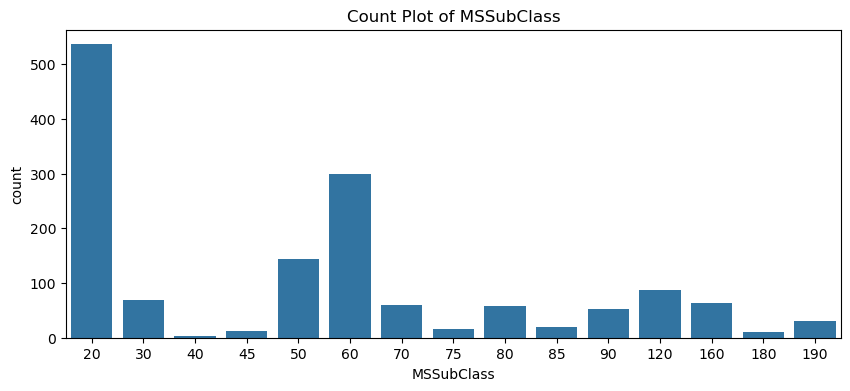

Visualizing MSZoning (nominal)


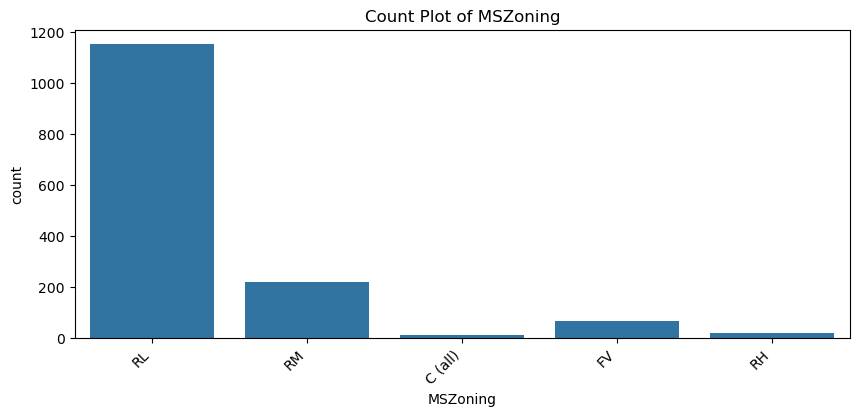

Visualizing LotFrontage (continuous)


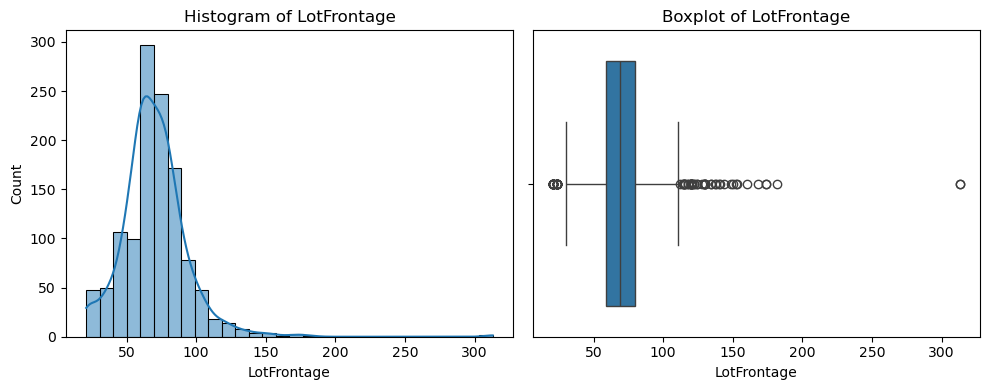

Visualizing LotArea (continuous)


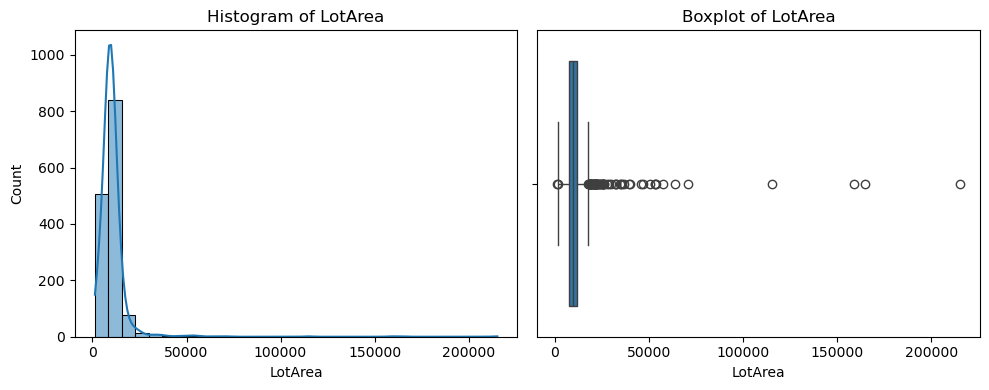

Visualizing Street (nominal)


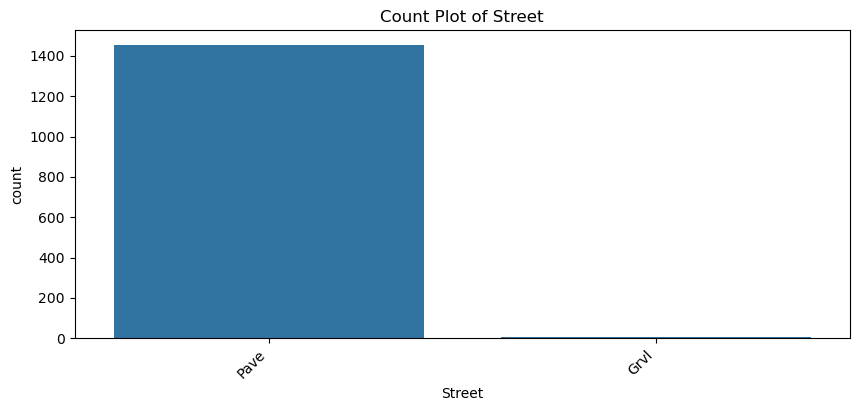

Visualizing Alley (nominal)


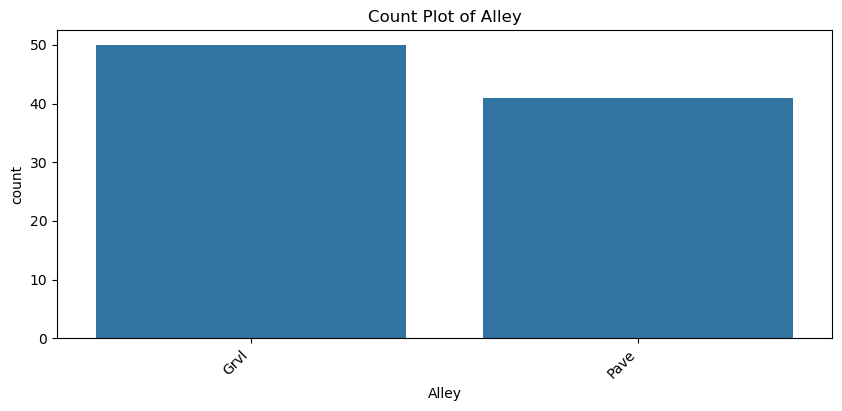

Visualizing LotShape (ordinal)


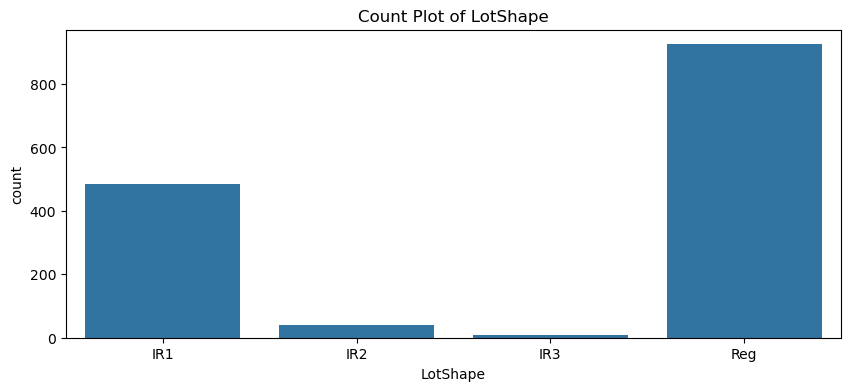

Visualizing LandContour (nominal)


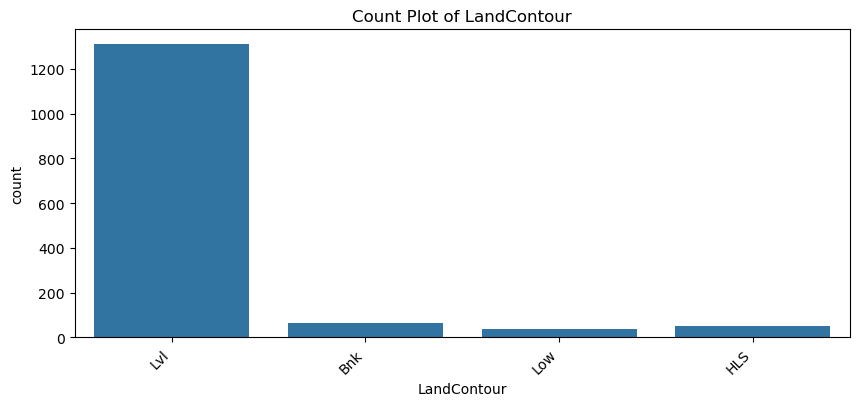

Visualizing Utilities (nominal)


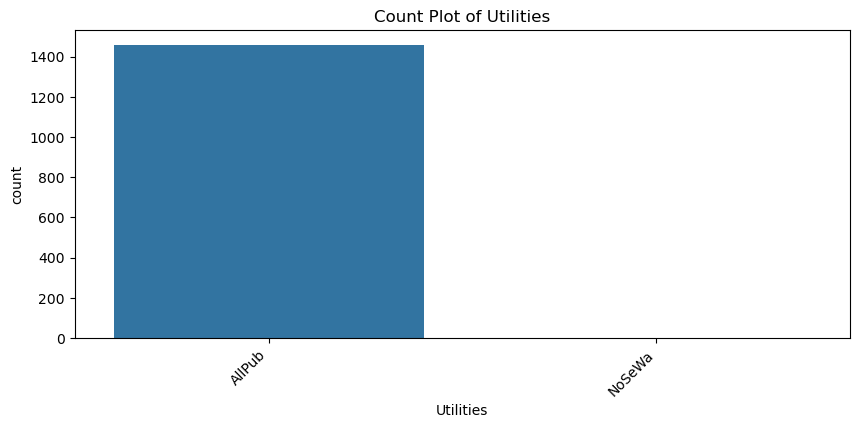

Visualizing LotConfig (nominal)


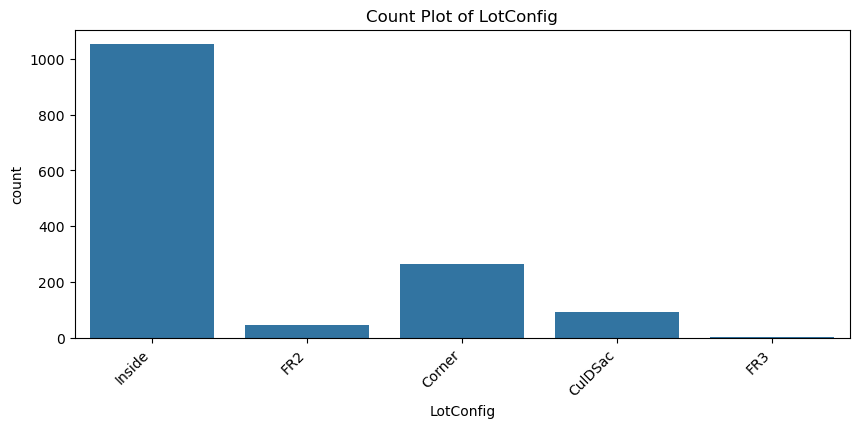

Visualizing LandSlope (ordinal)


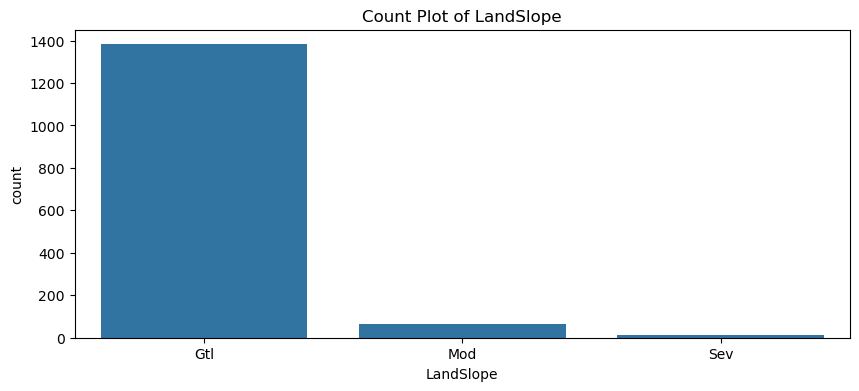

Visualizing Neighborhood (nominal)


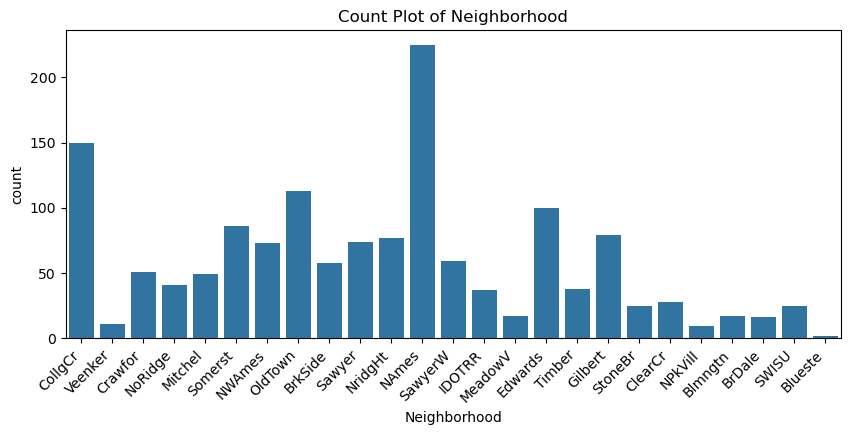

Visualizing Condition1 (nominal)


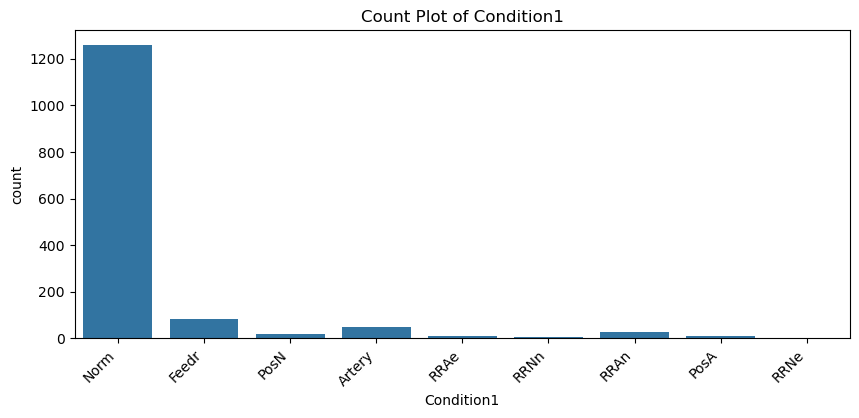

Visualizing Condition2 (nominal)


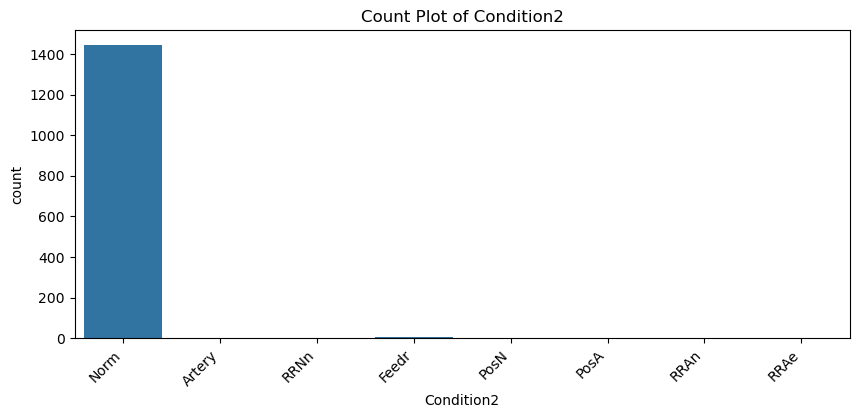

Visualizing BldgType (nominal)


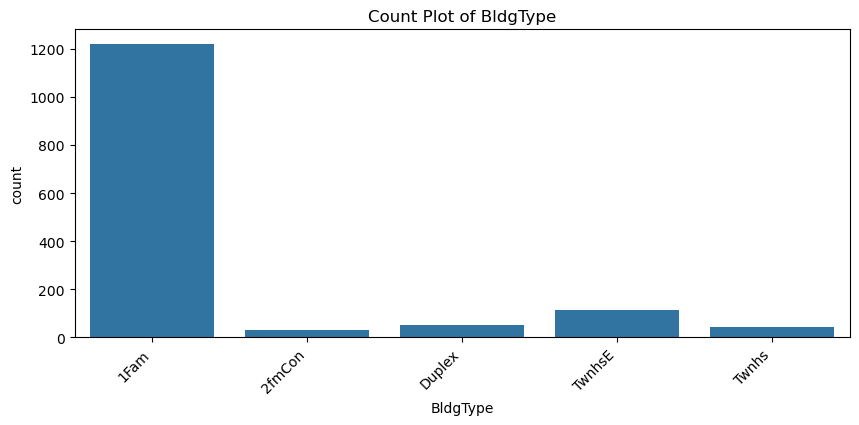

Visualizing HouseStyle (nominal)


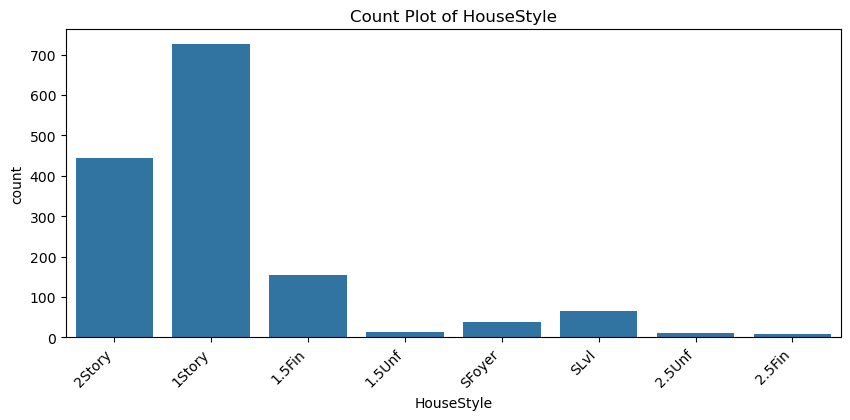

Visualizing OverallQual (ordinal)


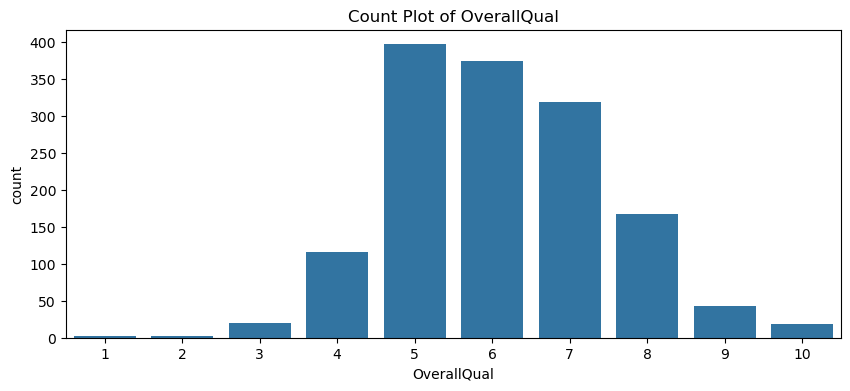

Visualizing OverallCond (ordinal)


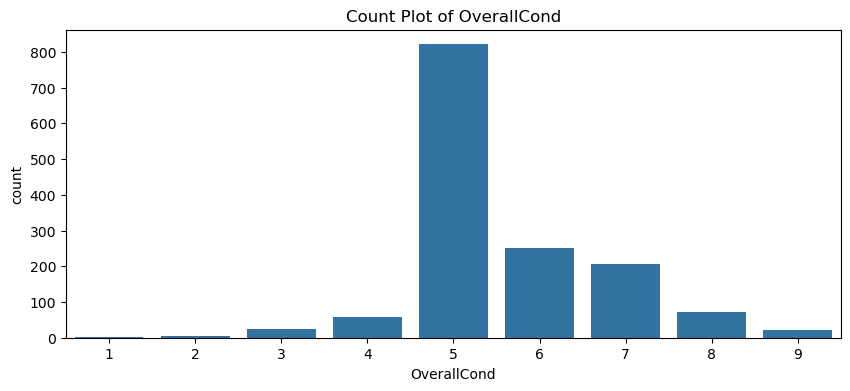

Visualizing YearBuilt (temporal)


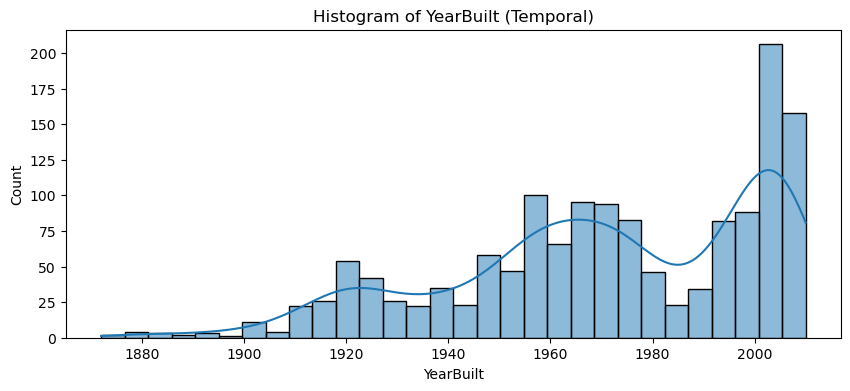

Visualizing YearRemodAdd (temporal)


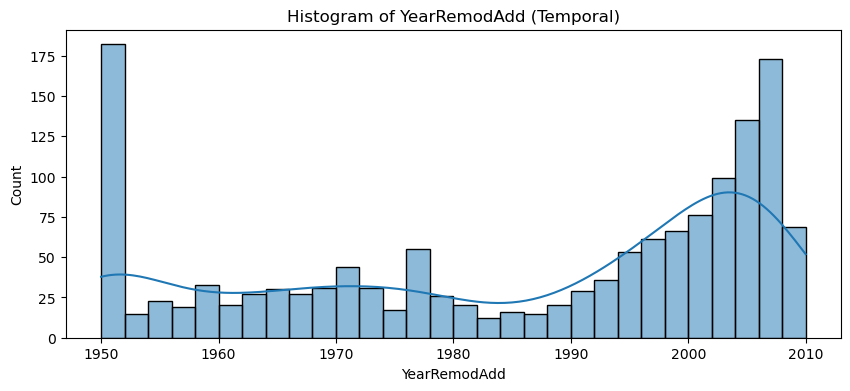

Visualizing RoofStyle (nominal)


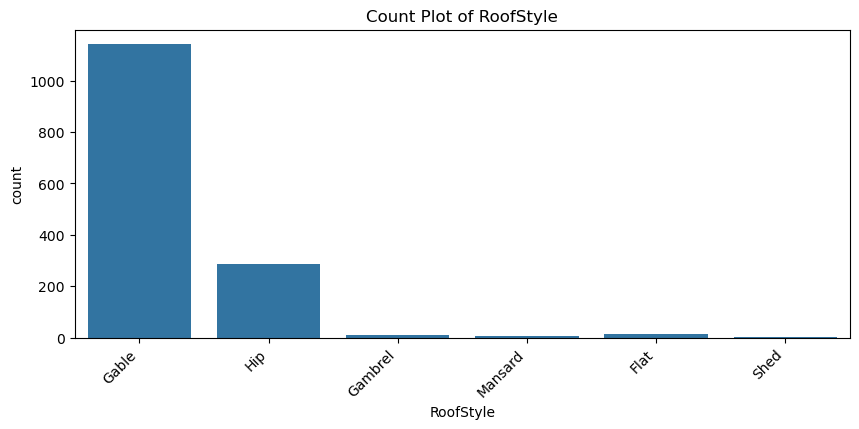

Visualizing RoofMatl (nominal)


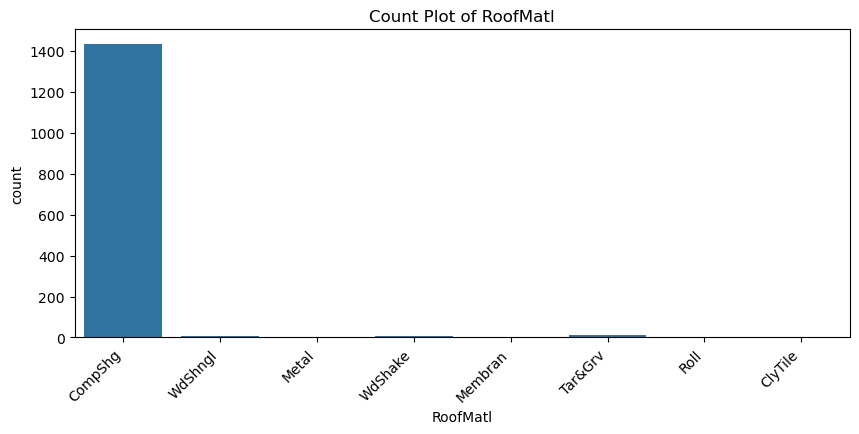

Visualizing Exterior1st (nominal)


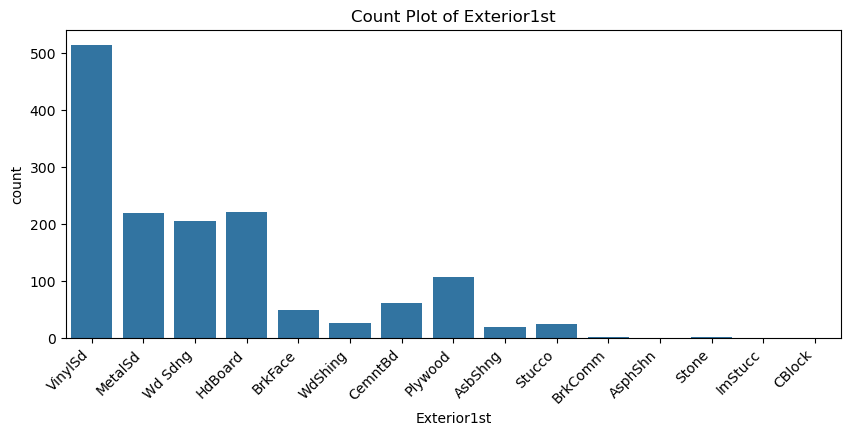

Visualizing Exterior2nd (nominal)


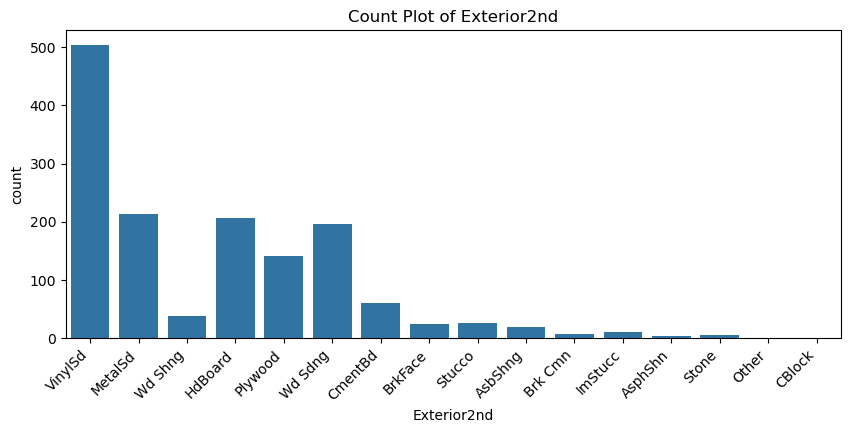

Visualizing MasVnrType (nominal)


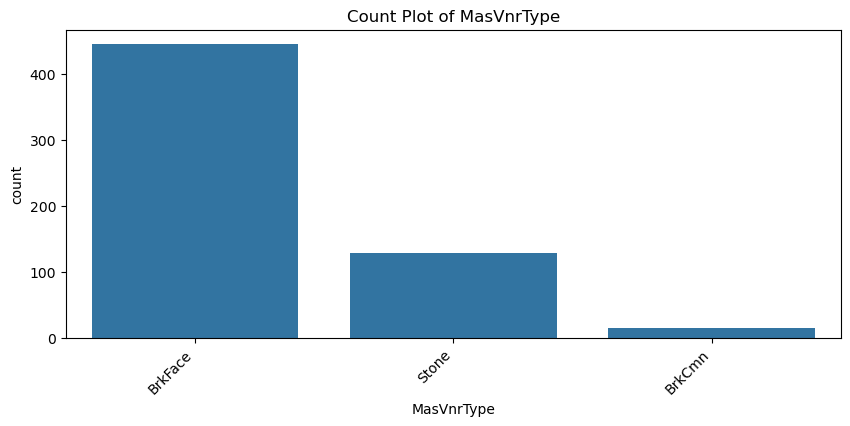

Visualizing MasVnrArea (continuous)


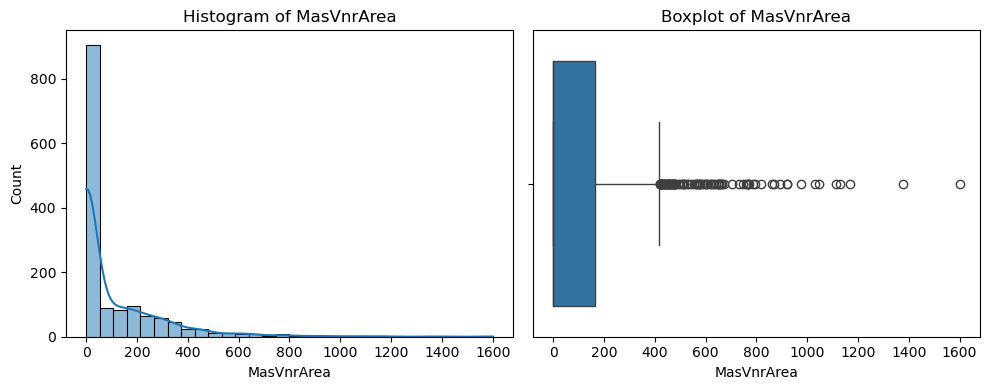

Visualizing ExterQual (ordinal)


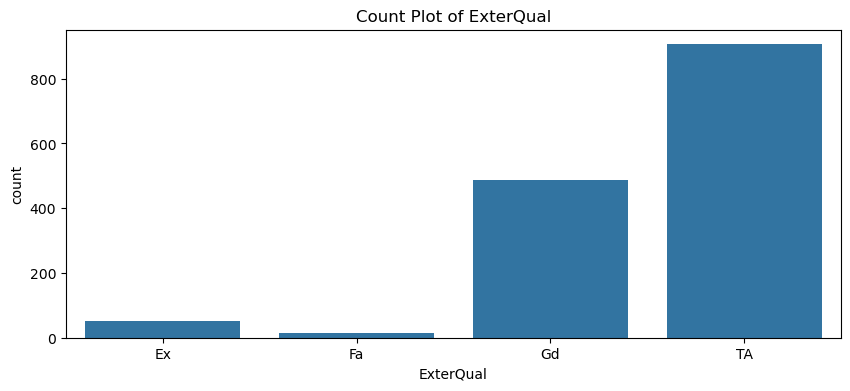

Visualizing ExterCond (ordinal)


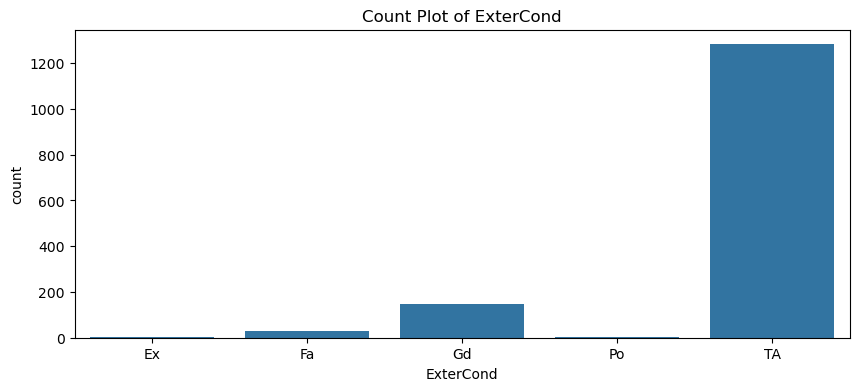

Visualizing Foundation (nominal)


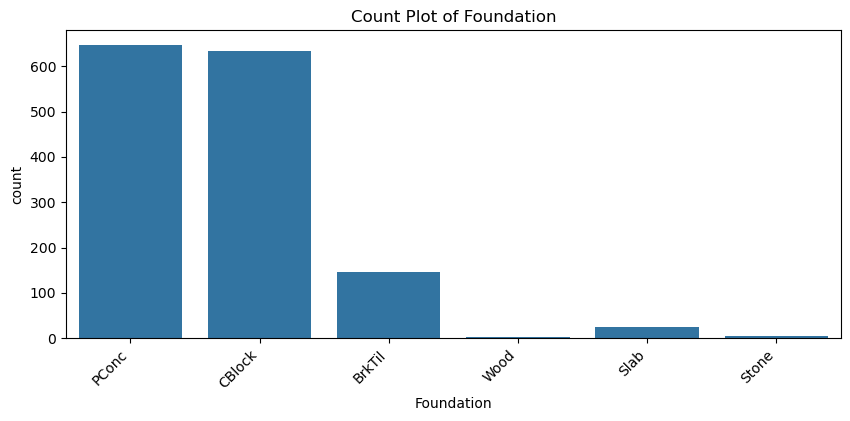

Visualizing BsmtQual (ordinal)


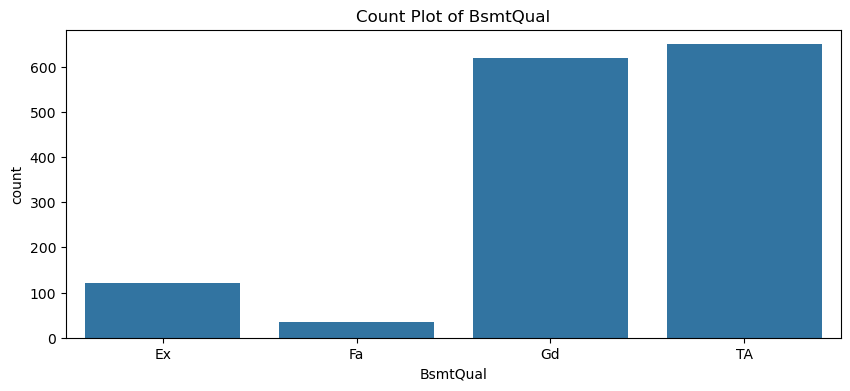

Visualizing BsmtCond (ordinal)


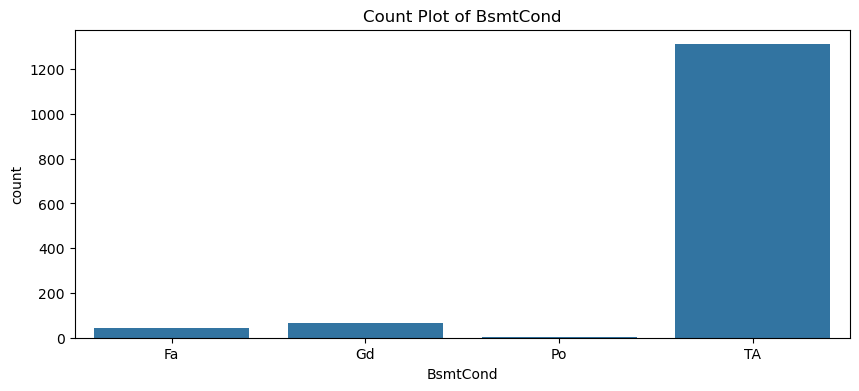

Visualizing BsmtExposure (ordinal)


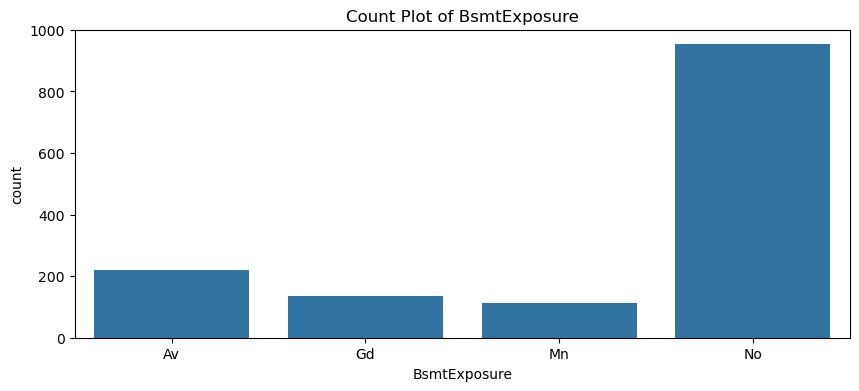

Visualizing BsmtFinType1 (ordinal)


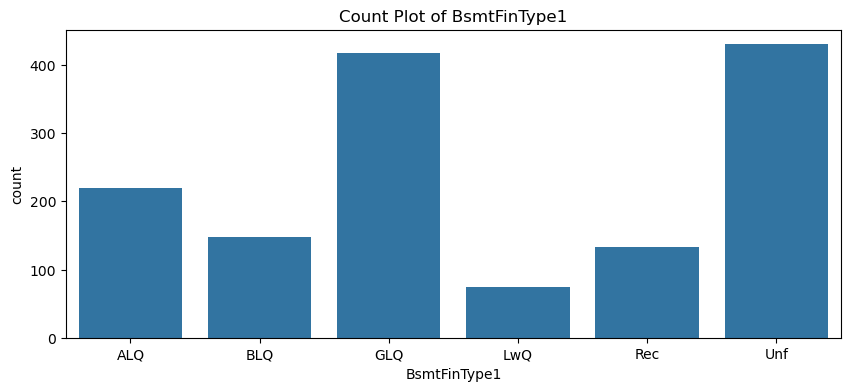

Visualizing BsmtFinSF1 (continuous)


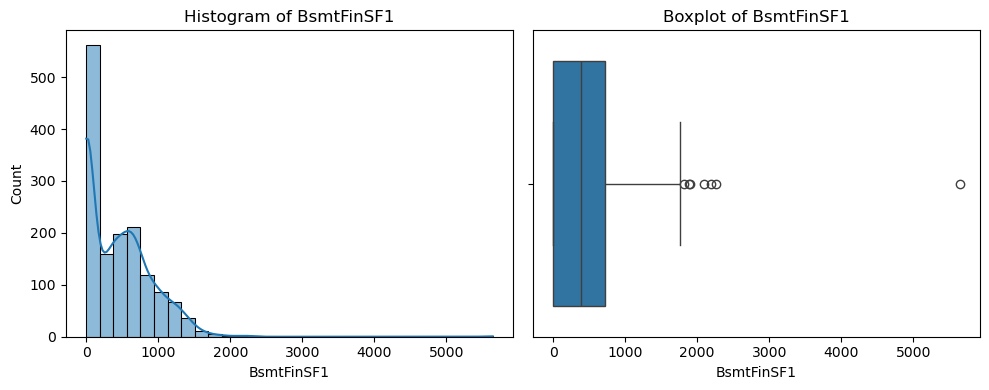

Visualizing BsmtFinType2 (ordinal)


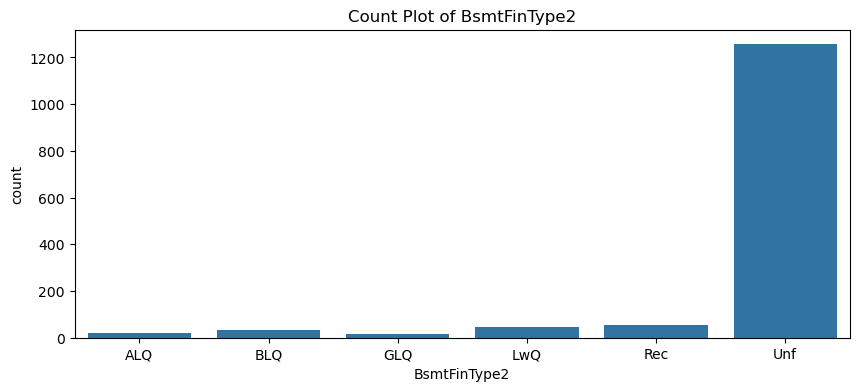

Visualizing BsmtFinSF2 (continuous)


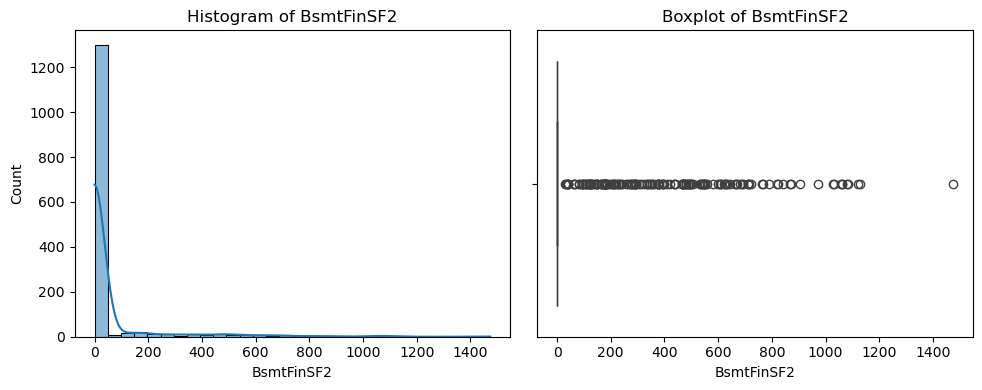

Visualizing BsmtUnfSF (continuous)


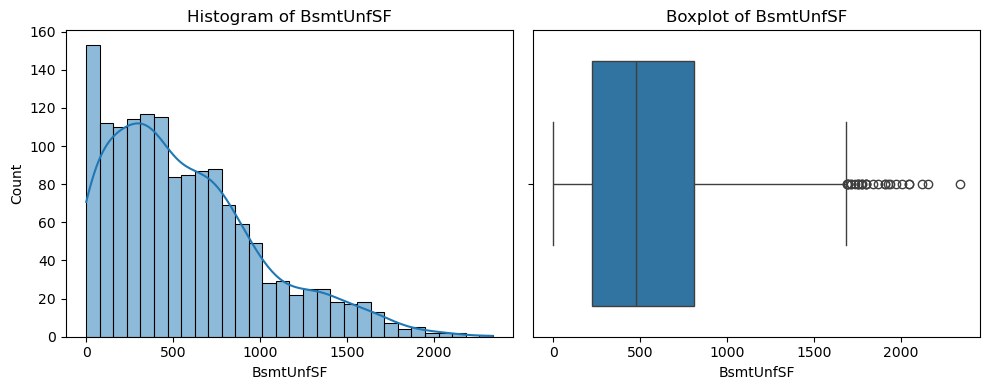

Visualizing TotalBsmtSF (continuous)


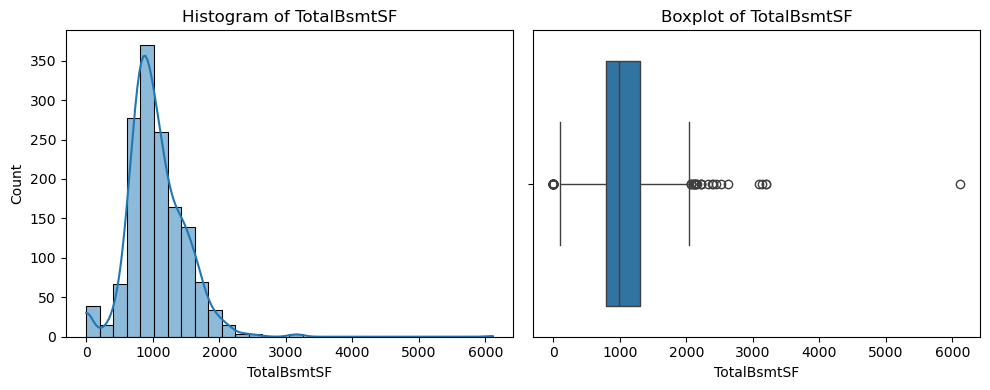

Visualizing Heating (nominal)


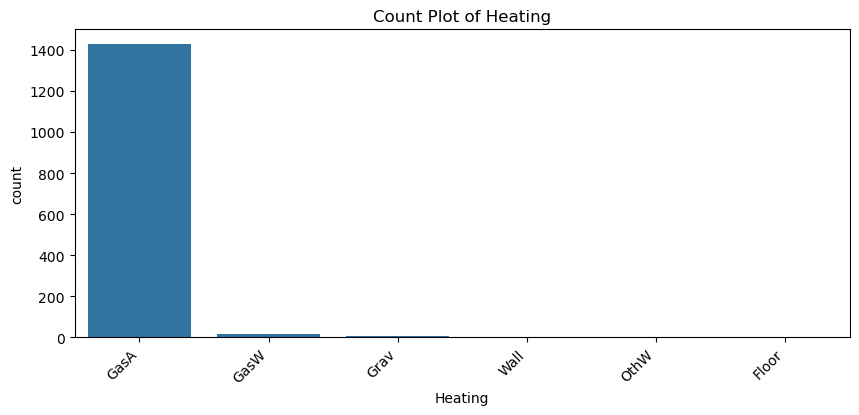

Visualizing HeatingQC (ordinal)


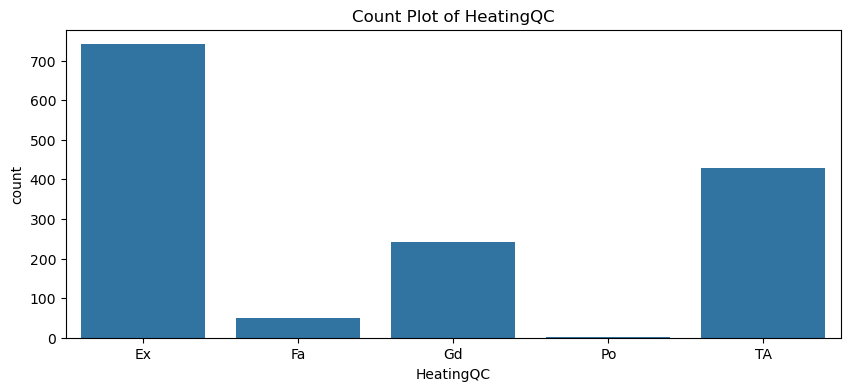

Visualizing CentralAir (boolean)


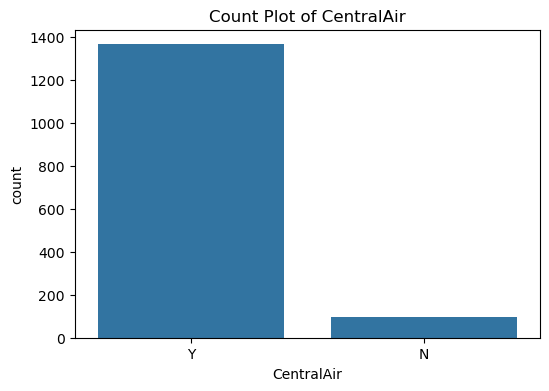

Visualizing Electrical (nominal)


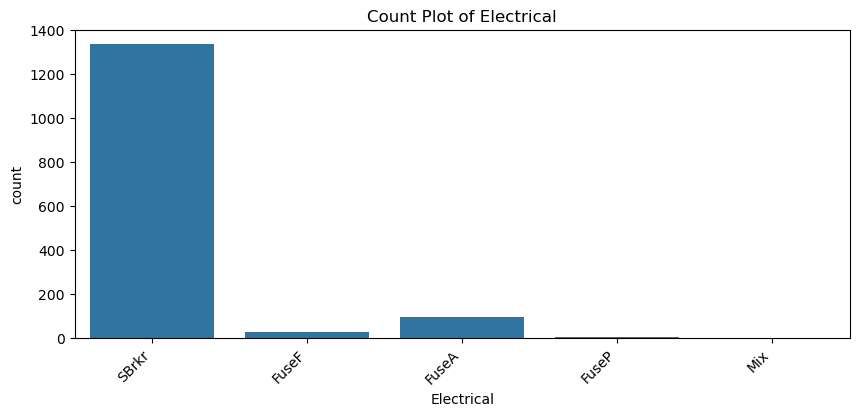

Visualizing 1stFlrSF (continuous)


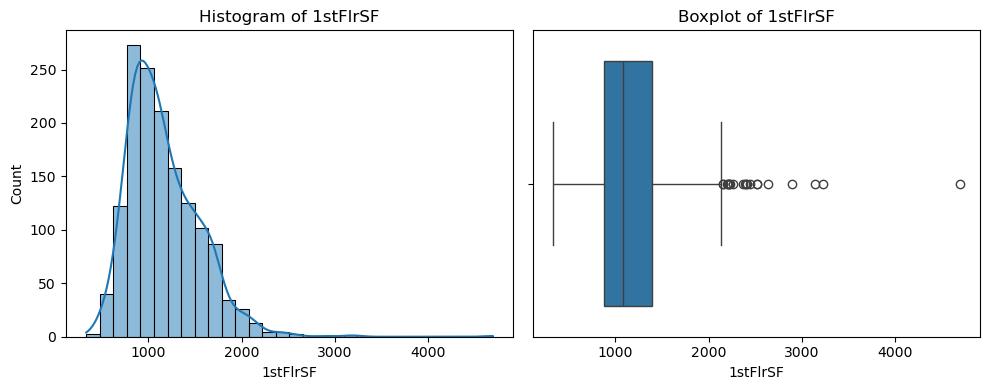

Visualizing 2ndFlrSF (continuous)


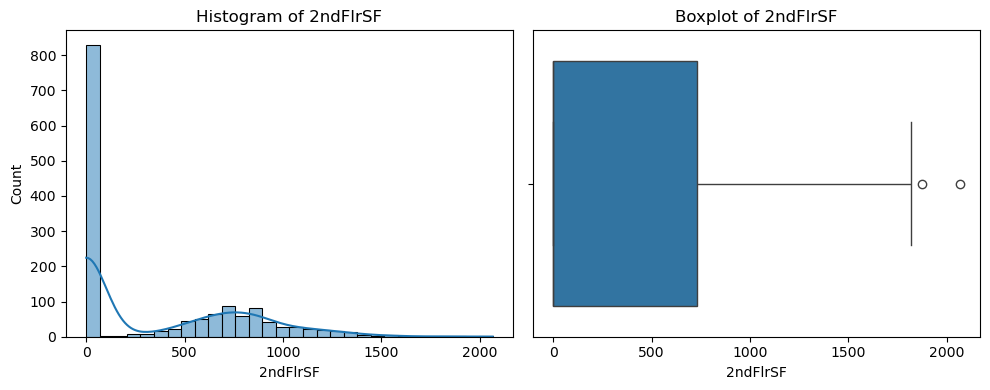

Visualizing LowQualFinSF (continuous)


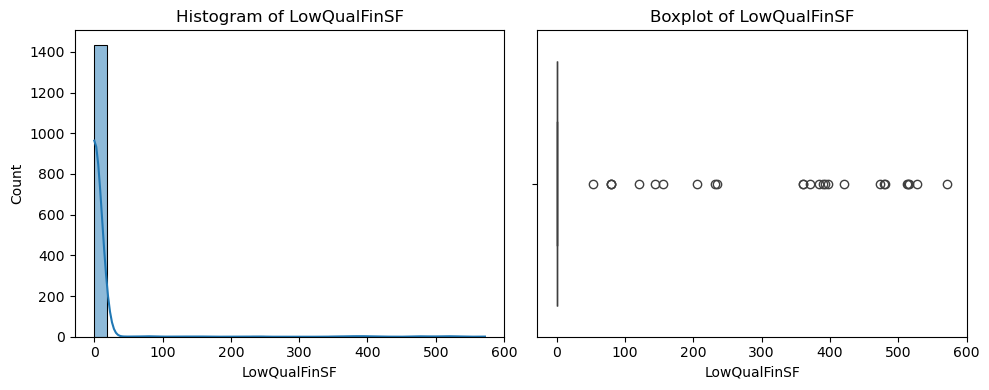

Visualizing GrLivArea (continuous)


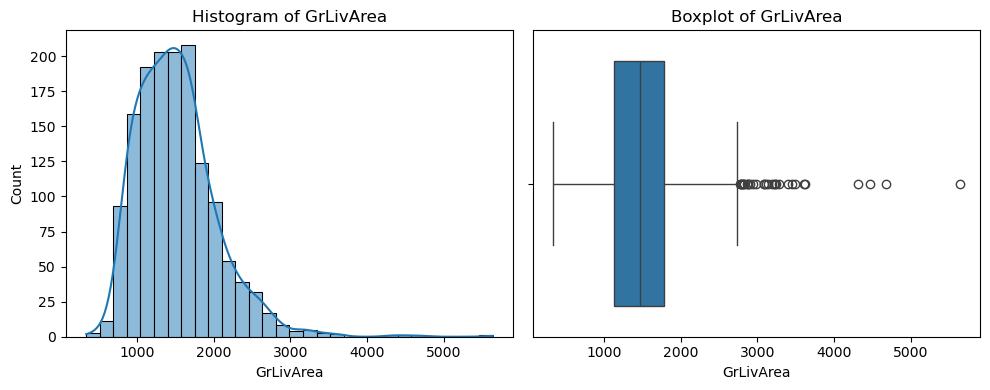

Visualizing BsmtFullBath (continuous)


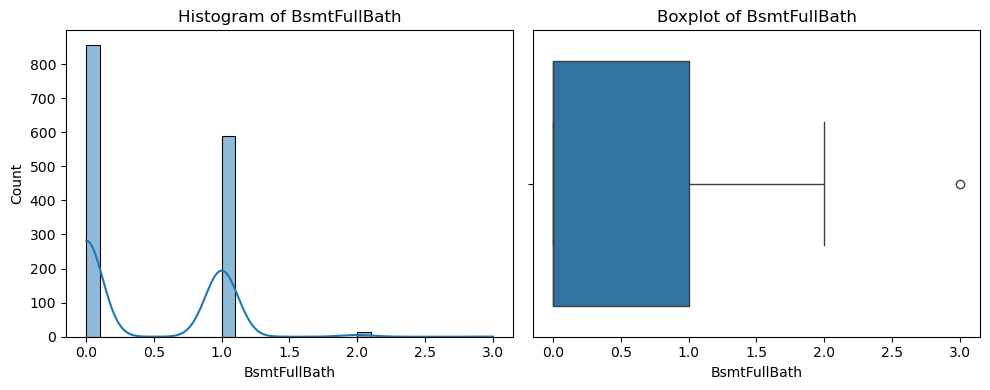

Visualizing BsmtHalfBath (continuous)


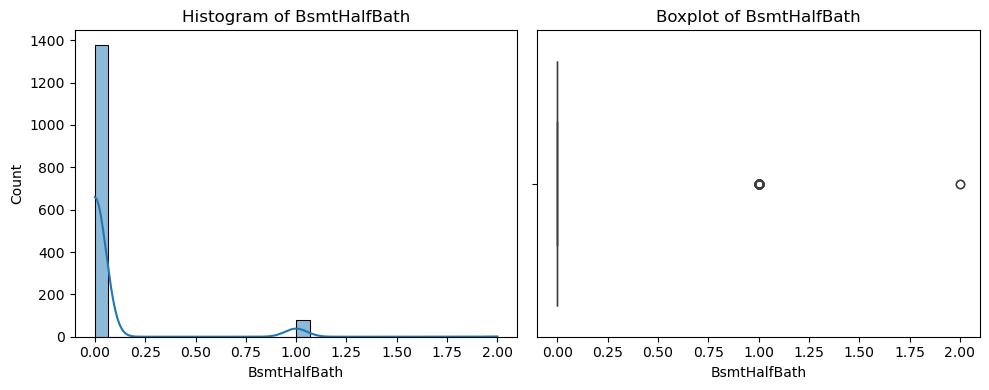

Visualizing FullBath (continuous)


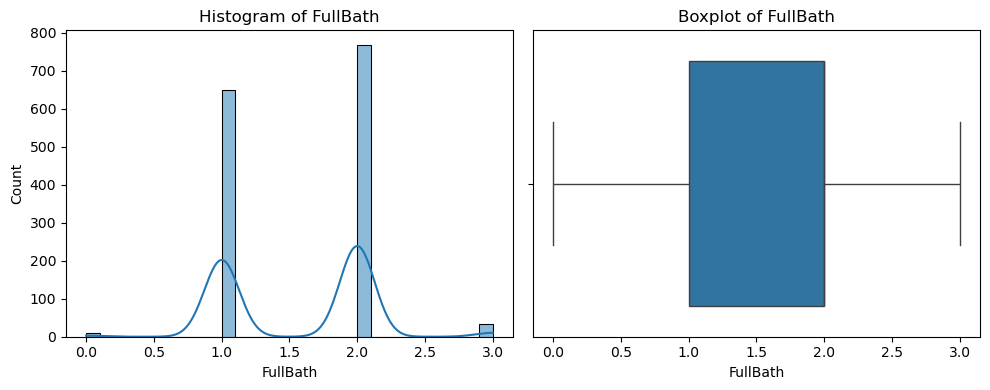

Visualizing HalfBath (continuous)


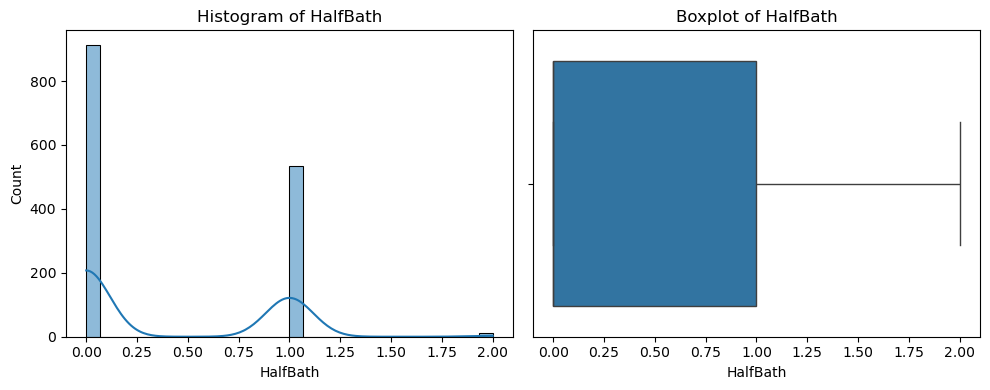

Visualizing BedroomAbvGr (continuous)


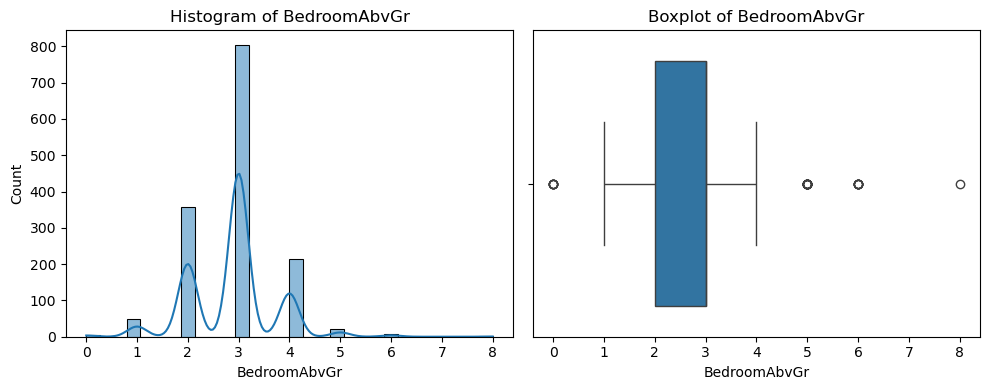

Visualizing KitchenAbvGr (continuous)


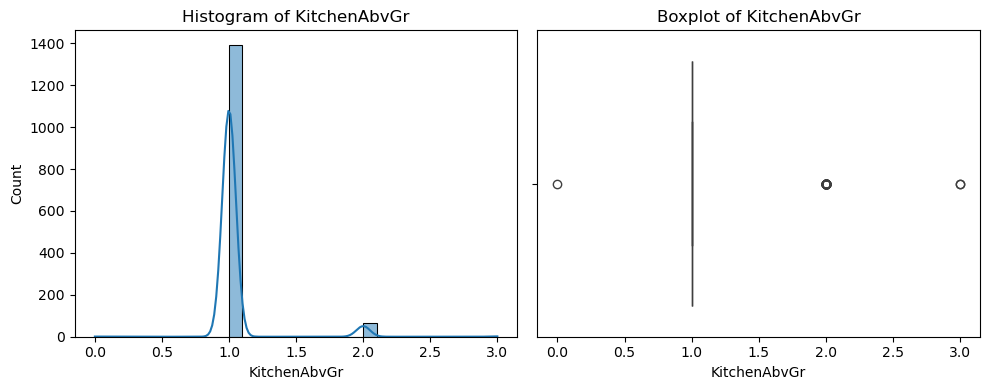

Visualizing KitchenQual (ordinal)


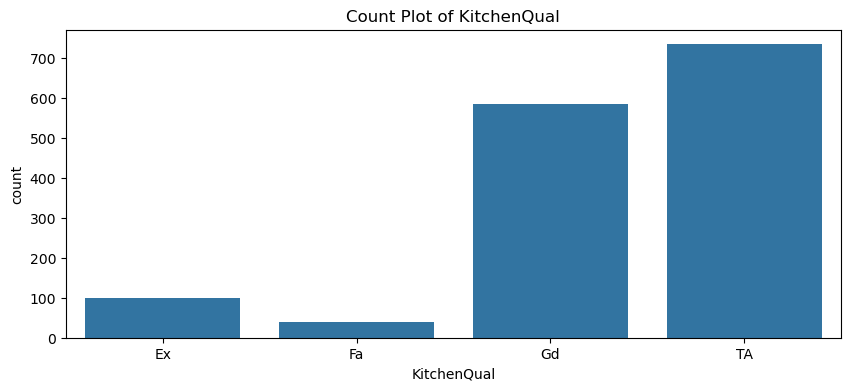

Visualizing TotRmsAbvGrd (continuous)


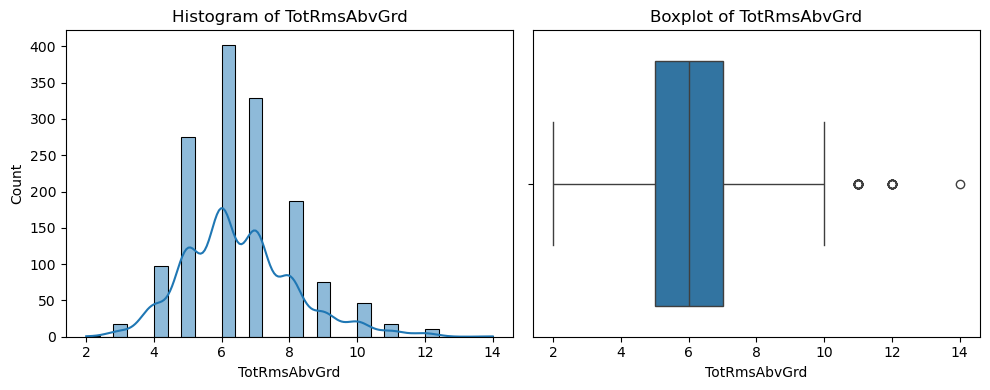

Visualizing Functional (ordinal)


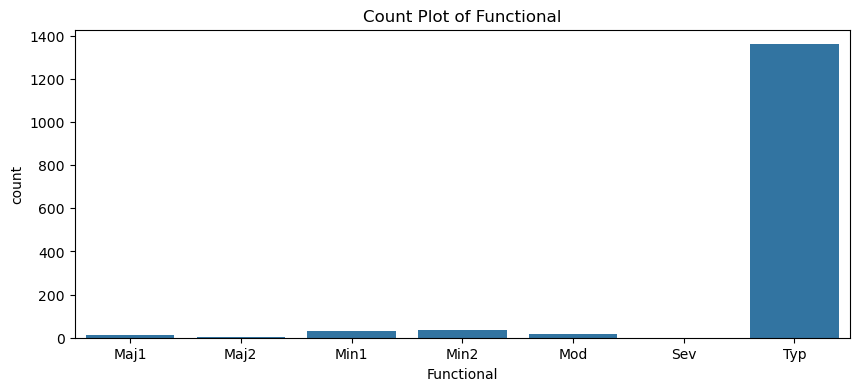

Visualizing Fireplaces (continuous)


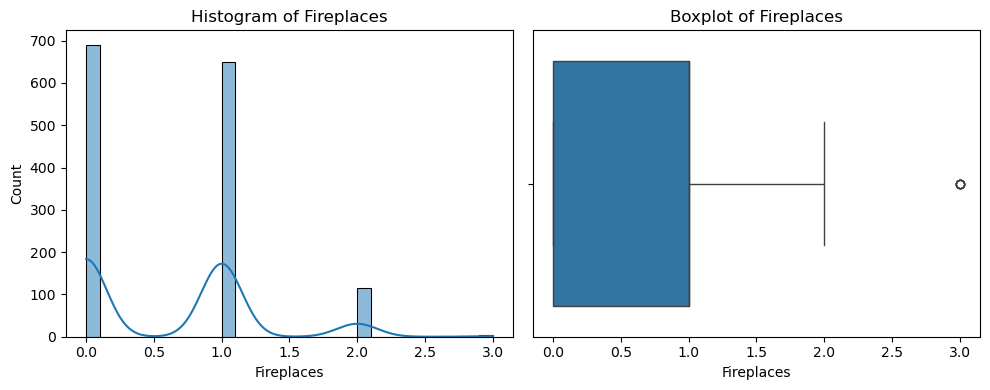

Visualizing FireplaceQu (ordinal)


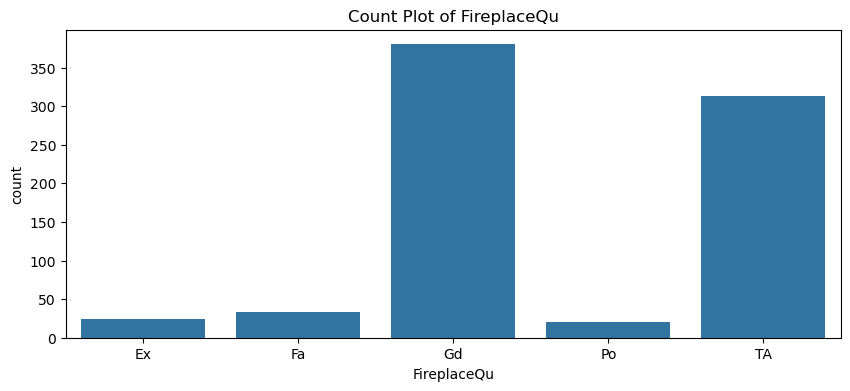

Visualizing GarageType (nominal)


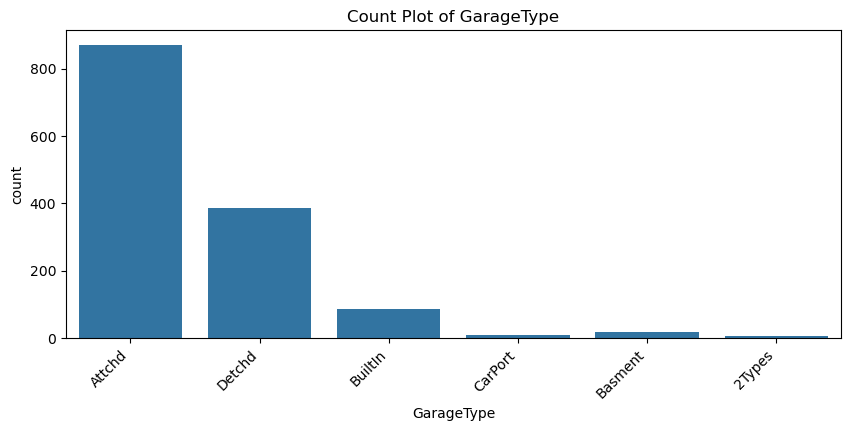

Visualizing GarageYrBlt (temporal)


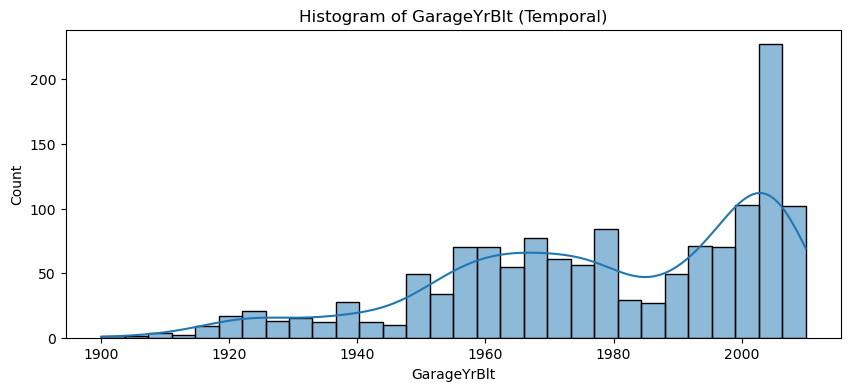

Visualizing GarageFinish (ordinal)


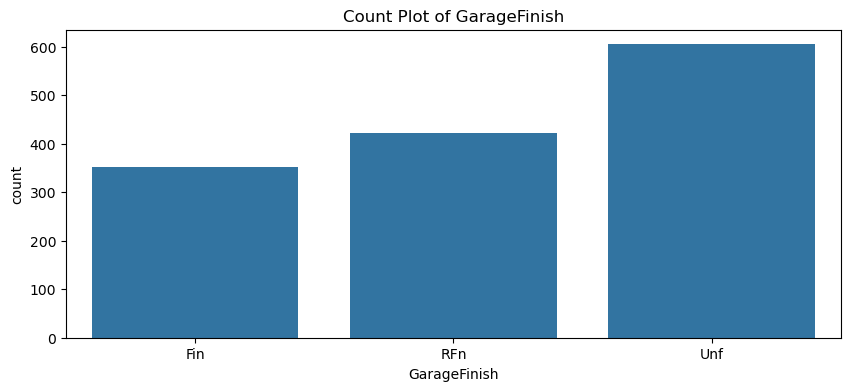

Visualizing GarageCars (continuous)


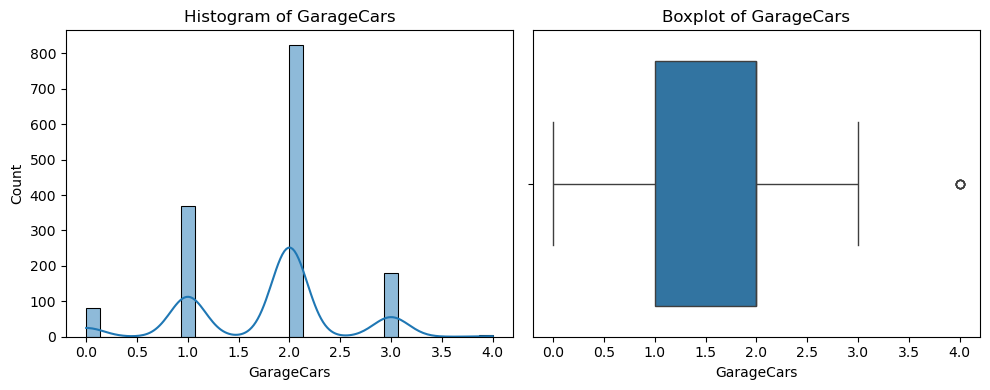

Visualizing GarageArea (continuous)


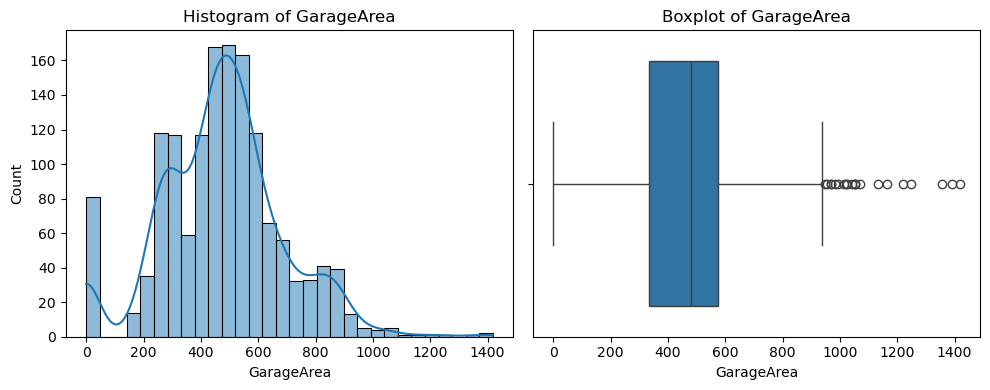

Visualizing GarageQual (ordinal)


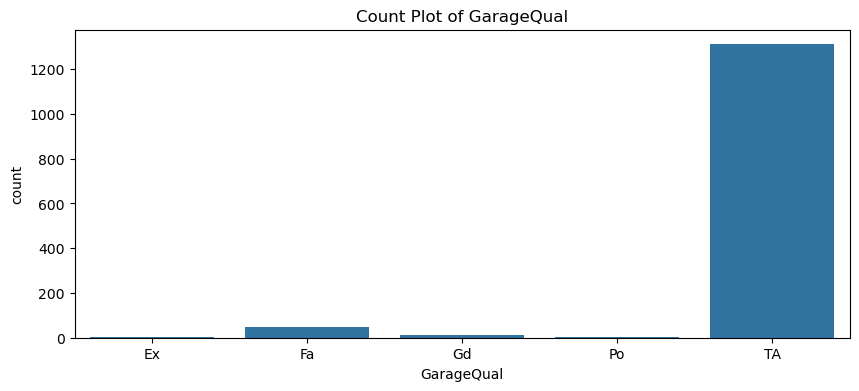

Visualizing GarageCond (ordinal)


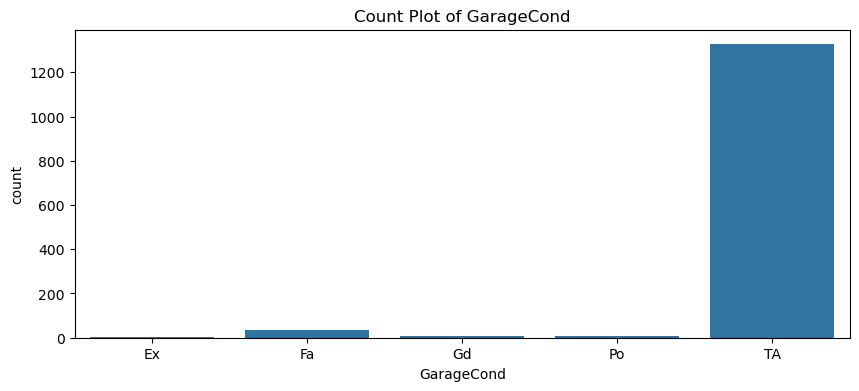

Visualizing PavedDrive (boolean)


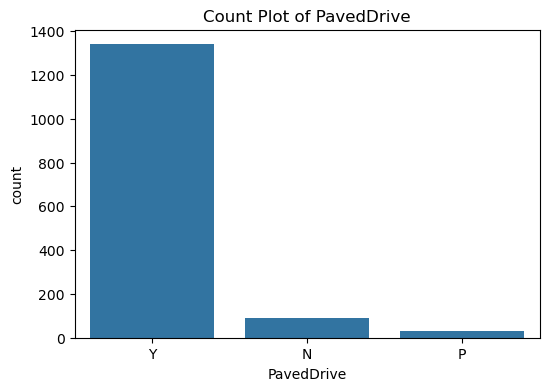

Visualizing WoodDeckSF (continuous)


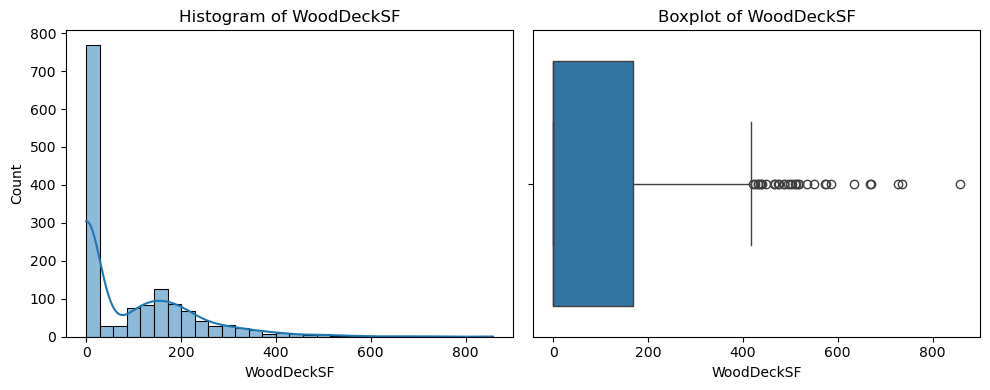

Visualizing OpenPorchSF (continuous)


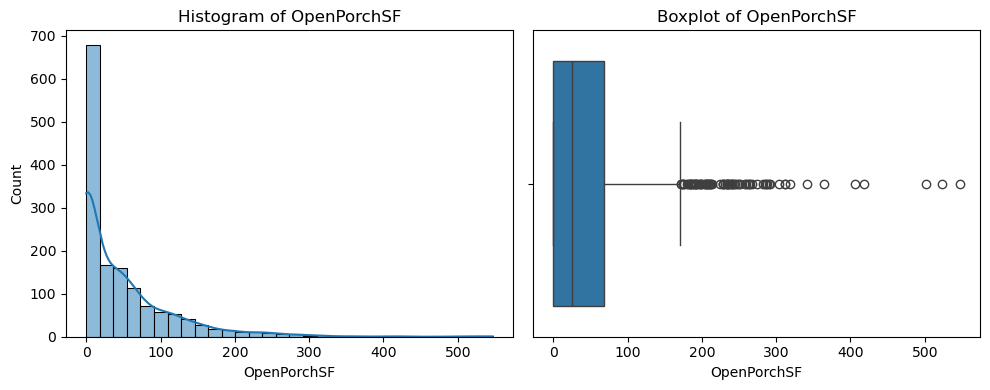

Visualizing EnclosedPorch (continuous)


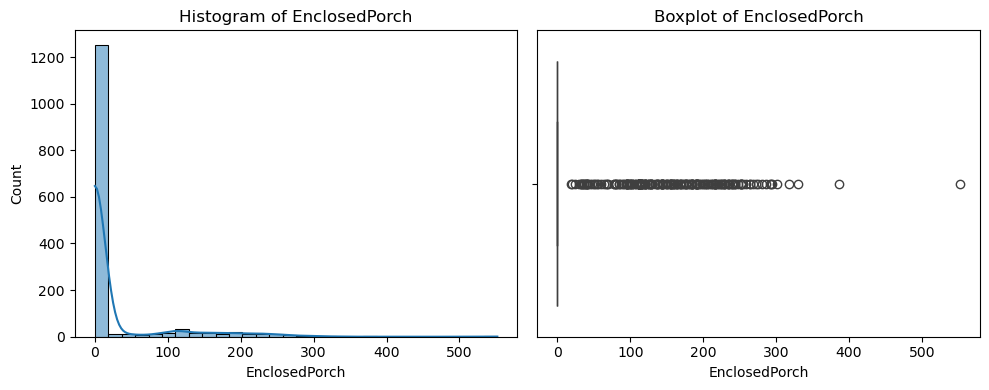

Visualizing 3SsnPorch (continuous)


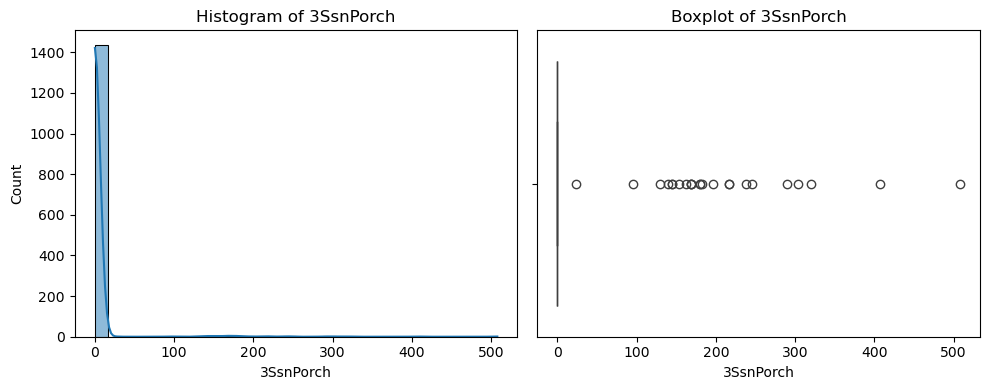

Visualizing ScreenPorch (continuous)


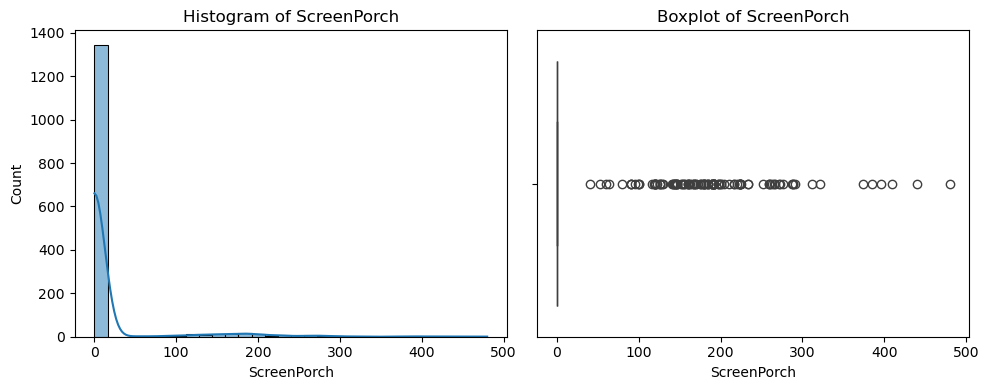

Visualizing PoolArea (continuous)


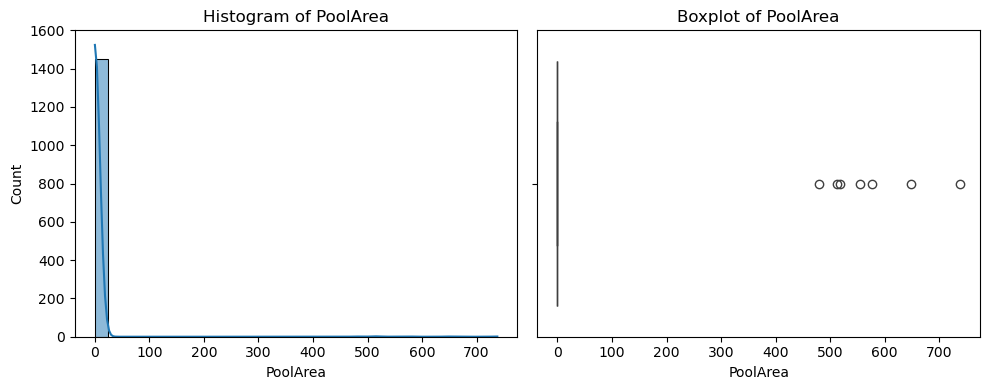

Visualizing PoolQC (ordinal)


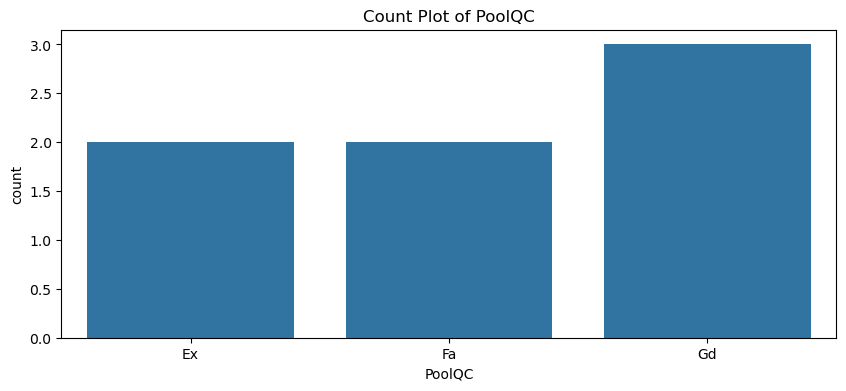

Visualizing Fence (nominal)


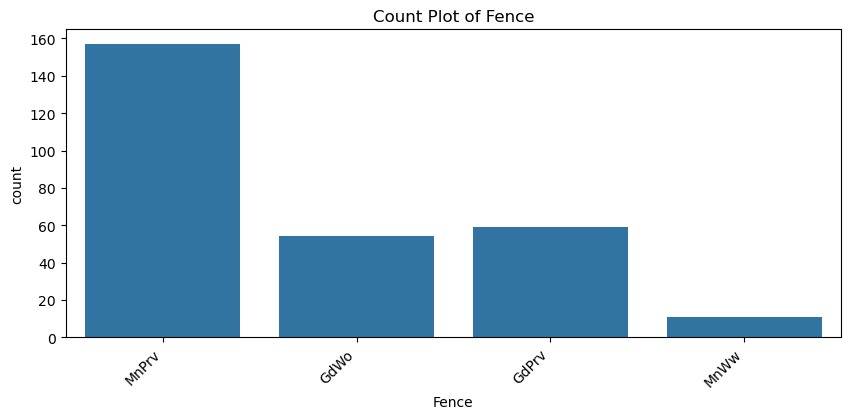

Visualizing MiscFeature (nominal)


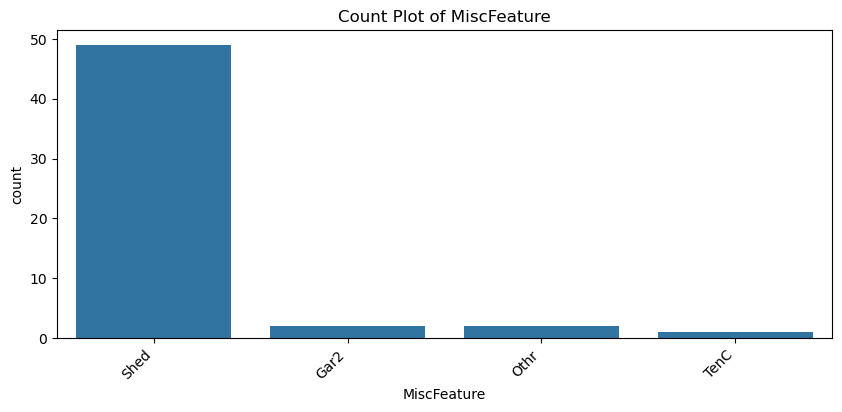

Visualizing MiscVal (continuous)


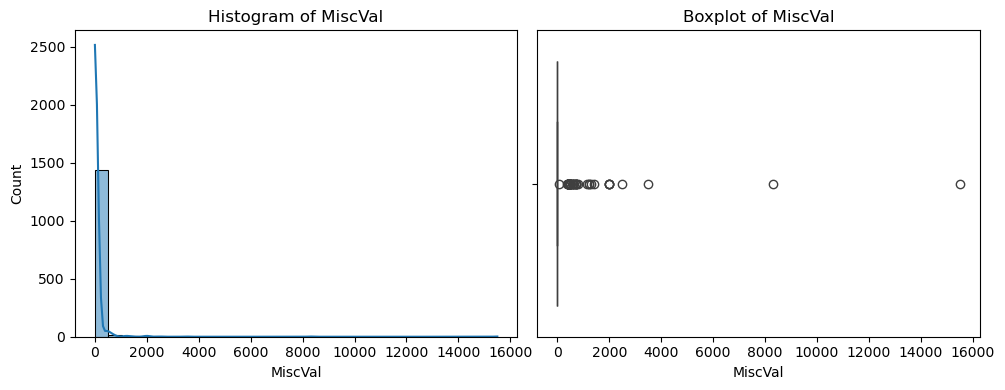

Visualizing MoSold (cyclic)


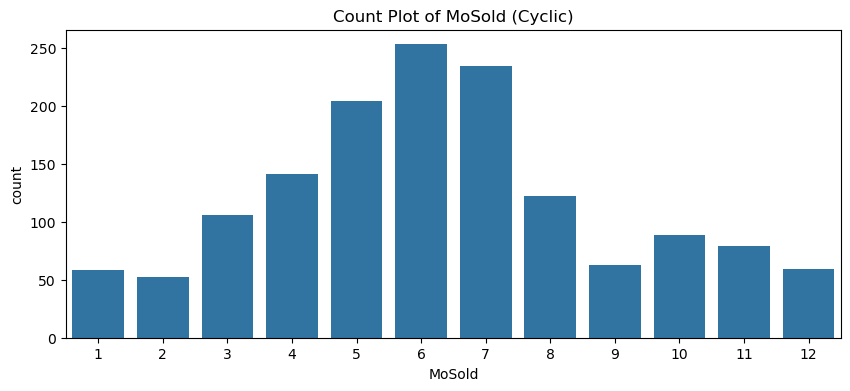

Visualizing YrSold (temporal)


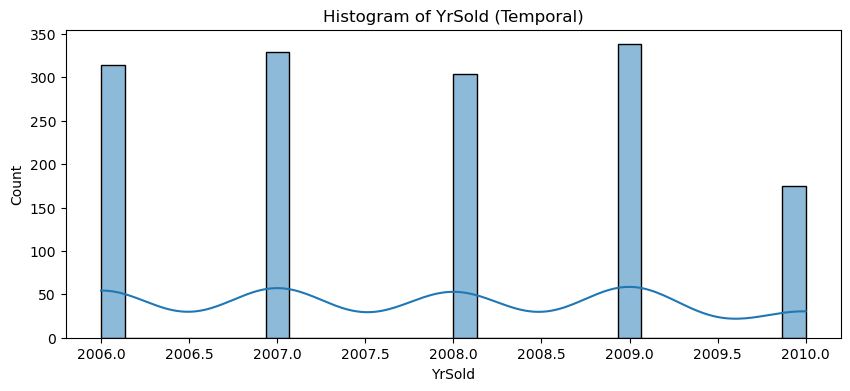

Visualizing SaleType (nominal)


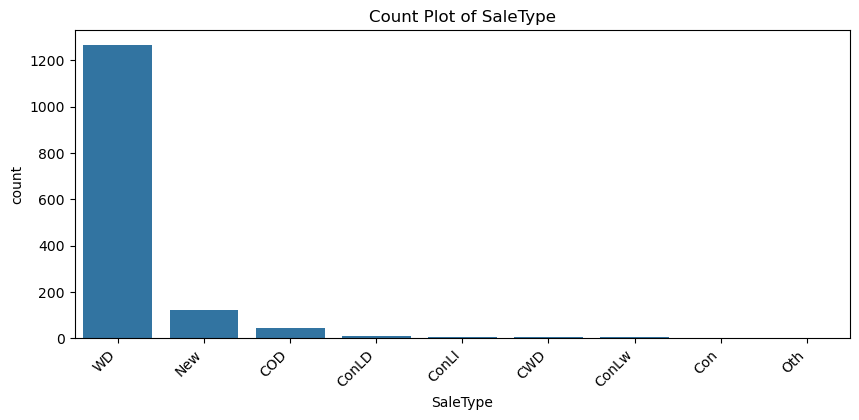

Visualizing SaleCondition (nominal)


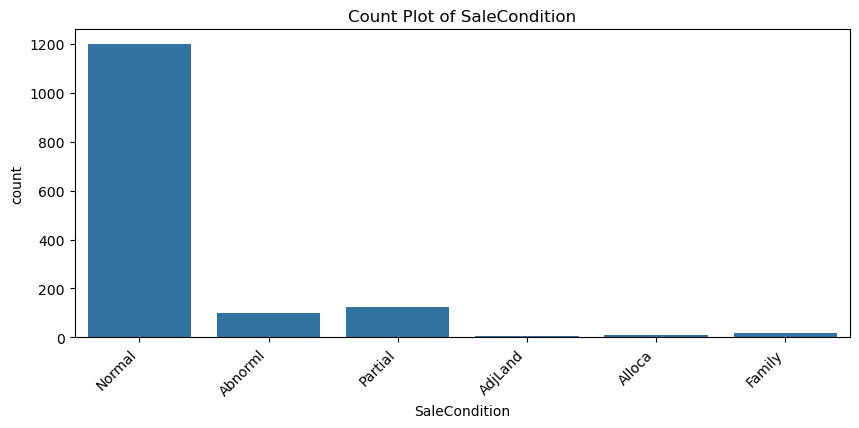

Visualizing SalePrice (None)
Feature SalePrice has an unknown feature type.


## Data Cleaning

Data cleaning is an essential step in preparing our dataset for analysis. In this section, we will handle missing values, deal with inconsistencies, and prepare the data for further analysis.

### 1. Handle Missing Values

First, we need to check which columns contain missing values and how we can handle them. Missing values can be dropped, imputed with mean/median/mode, or treated in other ways depending on the data type and context.


In [10]:
# Checking for missing values in the dataset
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_data_table = pd.concat([missing_data, missing_percentage], axis=1, keys=['Missing Values', '% of Total Values'])

# Display the columns with missing values
print("Columns with missing values and their percentages:")
print(missing_data_table[missing_data_table['Missing Values'] > 0])

# Handle missing values:
# - Drop columns where more than 50% of the data is missing
# - For numerical columns, we can impute missing values with the median.
# - For categorical columns, we can impute missing values with the mode.

# Drop columns where more than 50% of data is missing
threshold = 0.5 * len(df)
removed_columns = df.columns[df.isnull().sum() > threshold].tolist()

# Drop columns where more than 50% of data is missing
df = df.drop(columns=removed_columns)

# Print the list of removed columns
if removed_columns:
    print(f"Removed columns (more than 50% missing data): {removed_columns}")
else:
    print("No columns were removed due to missing data.")

# Replace missing values in numerical columns with the median and print the details
for col in df.select_dtypes(include=['float64', 'int64']):
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Missing values in column '{col}' replaced by the median: {median_value}")

# Replace missing values in categorical columns with the mode and print the details
for col in df.select_dtypes(include=['object']):
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Missing values in column '{col}' replaced by the mode: '{mode_value}'")


Columns with missing values and their percentages:
              Missing Values  % of Total Values
PoolQC                  1453          99.520548
MiscFeature             1406          96.301370
Alley                   1369          93.767123
Fence                   1179          80.753425
MasVnrType               872          59.726027
FireplaceQu              690          47.260274
LotFrontage              259          17.739726
GarageYrBlt               81           5.547945
GarageCond                81           5.547945
GarageType                81           5.547945
GarageFinish              81           5.547945
GarageQual                81           5.547945
BsmtFinType2              38           2.602740
BsmtExposure              38           2.602740
BsmtQual                  37           2.534247
BsmtCond                  37           2.534247
BsmtFinType1              37           2.534247
MasVnrArea                 8           0.547945
Electrical                 1         

### 2. Handle Inconsistent Data Types

Often, datasets have columns with inconsistent or incorrect data types (e.g., numerical data stored as strings). We will ensure that each column has the correct data type.

??convert to 'category'

In [15]:
# Convert MSSubClass to a categorical variable as it represents a class, not a numerical value
#df['MSSubClass'] = df['MSSubClass'].astype('category')

# Find and display examples of mixed data types within a column
for col in df.columns:
    mixed_types = df[col].apply(type).nunique() > 1  # Check if there are more than one data type
    if mixed_types:
        # Get the unique data types in the column
        unique_types = df[col].apply(type).unique()
        
        # Print column name and the different types found
        print(f"Column '{col}' contains mixed data types: {unique_types}")
        
        # Display examples of each data type
        print(f"Examples of different types in column '{col}':")
        for data_type in unique_types:
            examples = df[col][df[col].apply(lambda x: isinstance(x, data_type))].head(3).tolist()
            print(f" - {data_type}: {examples}")
        print()  # Blank line for readability

todo: correct types based on data_description.txt

### 3. Handle Outliers

Outliers can distort the analysis, especially in regression tasks. We will detect and handle outliers using the IQR (Interquartile Range) method for continuous variables.

In [ ]:
# Function to remove outliers using IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows with outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to key continuous columns
# For example, removing outliers from 'GrLivArea' and 'LotArea'
df = remove_outliers(df, 'GrLivArea')
df = remove_outliers(df, 'LotArea')


### 4. Standardize Categorical Variables

Categorical variables often need to be standardized or encoded for analysis. In this step, we will handle categorical variables by encoding them into numerical representations.


In [ ]:
# 4. Standardizing Categorical Variables

# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display the updated dataframe
print("Updated dataframe after one-hot encoding:")
print(df.head())


### 5. Final Check

After performing the cleaning steps, we'll do a final check to ensure there are no remaining missing values or inconsistencies.


In [ ]:
# 5. Final Check

# Recheck for any remaining missing values
final_missing_data = df.isnull().sum().sum()
if final_missing_data == 0:
    print("Data cleaning complete. No missing values remain.")
else:
    print(f"Warning: There are still {final_missing_data} missing values in the dataset.")

# Display the final cleaned dataset
print("Final cleaned dataset overview:")
print(df.info())
